#### Part 2: Exploratory Data Analysis

Exploring the data.

In this notebook, I will be carrying out some exploratory data analysis to gather some useful insights about my dataset. I will also plot the distribution of the data to support my findings and understanding.

A summary of key findings is noted at the end of the notebook.

**Importing Libraries**

In [1]:
# Main Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from wordcloud import WordCloud

#Text Data Processing
from sklearn.feature_extraction.text import CountVectorizer

%config InlineBackend.figure_format="retina"

In [2]:
pwd

'/Users/faisal/Desktop/Data Science Bootcamp/capstone-project-fai22399-git/notebooks'

In [3]:
#load data
cleandf = joblib.load('../data/cleandf.pkl')

FileNotFoundError: [Errno 2] No such file or directory: '../data/cleandf.pkl'

#### Exploratory Data Analysis and Distributions

In [ ]:
cleandf.head()

,airline,overall,author,customer_review,cabin,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,review_year,review_month
0,Turkish Airlines,7.0,Christopher Hackley,london to izmir via istanbul first time iâ d...,Economy Class,4.0,5.0,4.0,4.0,2.0,4.0,yes,2019,5
1,Turkish Airlines,2.0,Adriana Pisoi,stanbul to bucharest we make our check in in ...,Economy Class,4.0,1.0,1.0,1.0,1.0,1.0,no,2019,5
2,Turkish Airlines,3.0,M Galerko,ome to prishtina via istanbul i flew with thi...,Economy Class,1.0,4.0,1.0,3.0,1.0,2.0,no,2019,5
3,Turkish Airlines,10.0,Zeshan Shah,lew on turkish airlines iad ist khi and return...,Economy Class,4.0,5.0,5.0,5.0,5.0,5.0,yes,2019,5
4,Turkish Airlines,1.0,Pooja Jain,mumbai to dublin via istanbul never book turk...,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,no,2019,5


In [ ]:
#list of columns to explore
list(cleandf.columns)

['airline',
 'overall',
 'author',
 'customer_review',
 'cabin',
 'seat_comfort',
 'cabin_service',
 'food_bev',
 'entertainment',
 'ground_service',
 'value_for_money',
 'recommended',
 'review_year',
 'review_month']

#### Distribution: Recommended (Target Variable)

Understanding the distribution of the target variable provides insights into the balance of groups, which is crucial for understanding potential biases in the dataset.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


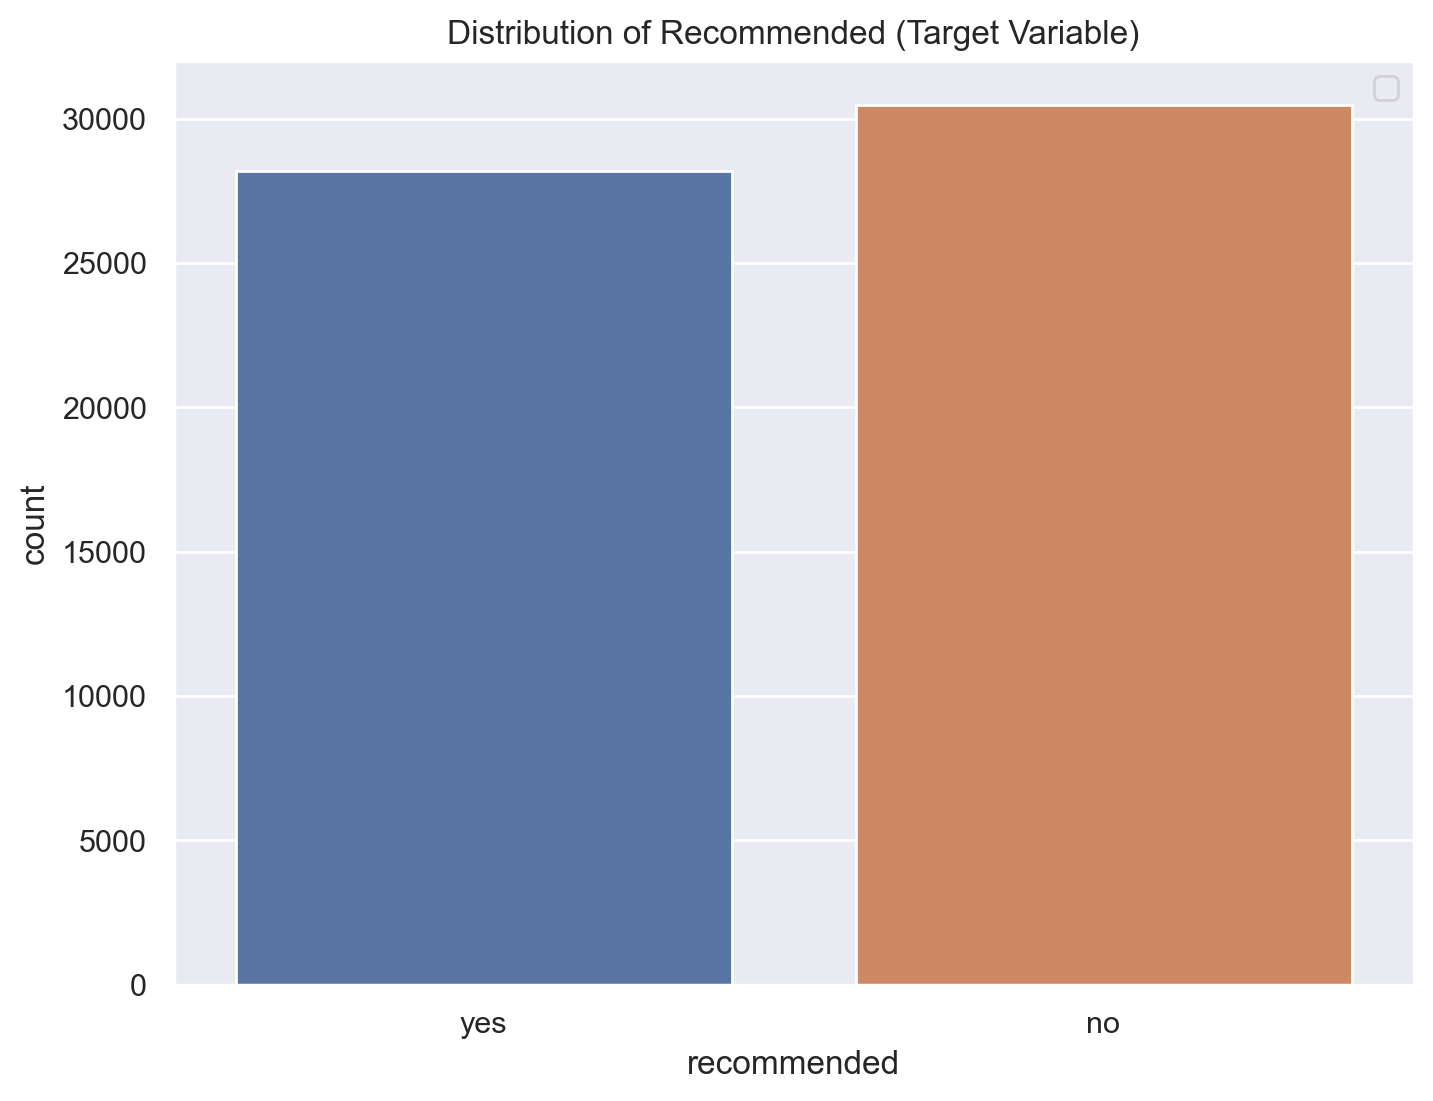

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='recommended', data=cleandf)
plt.title('Distribution of Recommended (Target Variable)')
plt.legend()
plt.show()

In [ ]:
cleandf['recommended'].value_counts()

no     30495
yes    28204
Name: recommended, dtype: int64

**Summary:**
- The distribution of the target variable "recommended" shows 28,204 of reviews are labeled as "yes" and 30,495 as "no."
- There is a slight imbalance between the two classes, with a `negative` bias.

This shows that there are  more passengers who would not recommend the airline services based on their experiences than those who would recommend.

This is a perfect baseline for the project as we will look into identifying specific reasons why.

**Implications for use case:**


- The slight imbalance suggests that a majority of customers express negative sentiments, which is a positive indicator for customer service.
- The imbalance could be considered when designing strategies for addressing negative feedback, aiming for more balanced sentiment distribution.

#### Distribution: Airline

In [ ]:
#count how many airlines are in the dataset
print(f"Number of Airlines: {len(list(cleandf['airline'].unique()))}")

Number of Airlines: 81


The dataset has reviews for 81 different airlines. This makes perfect sense as the aviation indsutry is highly competitive, and 81 airlines would be nowhere near the actual total amount of active airlines operating as we speak.

**Airline Distribution Plot**

With 81 airlines, it would be difficult to visualise them all on a graph. I will focus on the **Top 15 airlines by number of reviews**.

In [ ]:
# Top airlines with the most reviews
top_airlines = cleandf['airline'].value_counts().nlargest(10)


# Airlines with the most negative reviews
most_negative_airlines = cleandf[cleandf['recommended'] == 'no']['airline'].value_counts().nlargest(10)


# Airlines with the most positive reviews
most_positive_airlines = cleandf[cleandf['recommended'] == 'yes']['airline'].value_counts().nlargest(10)

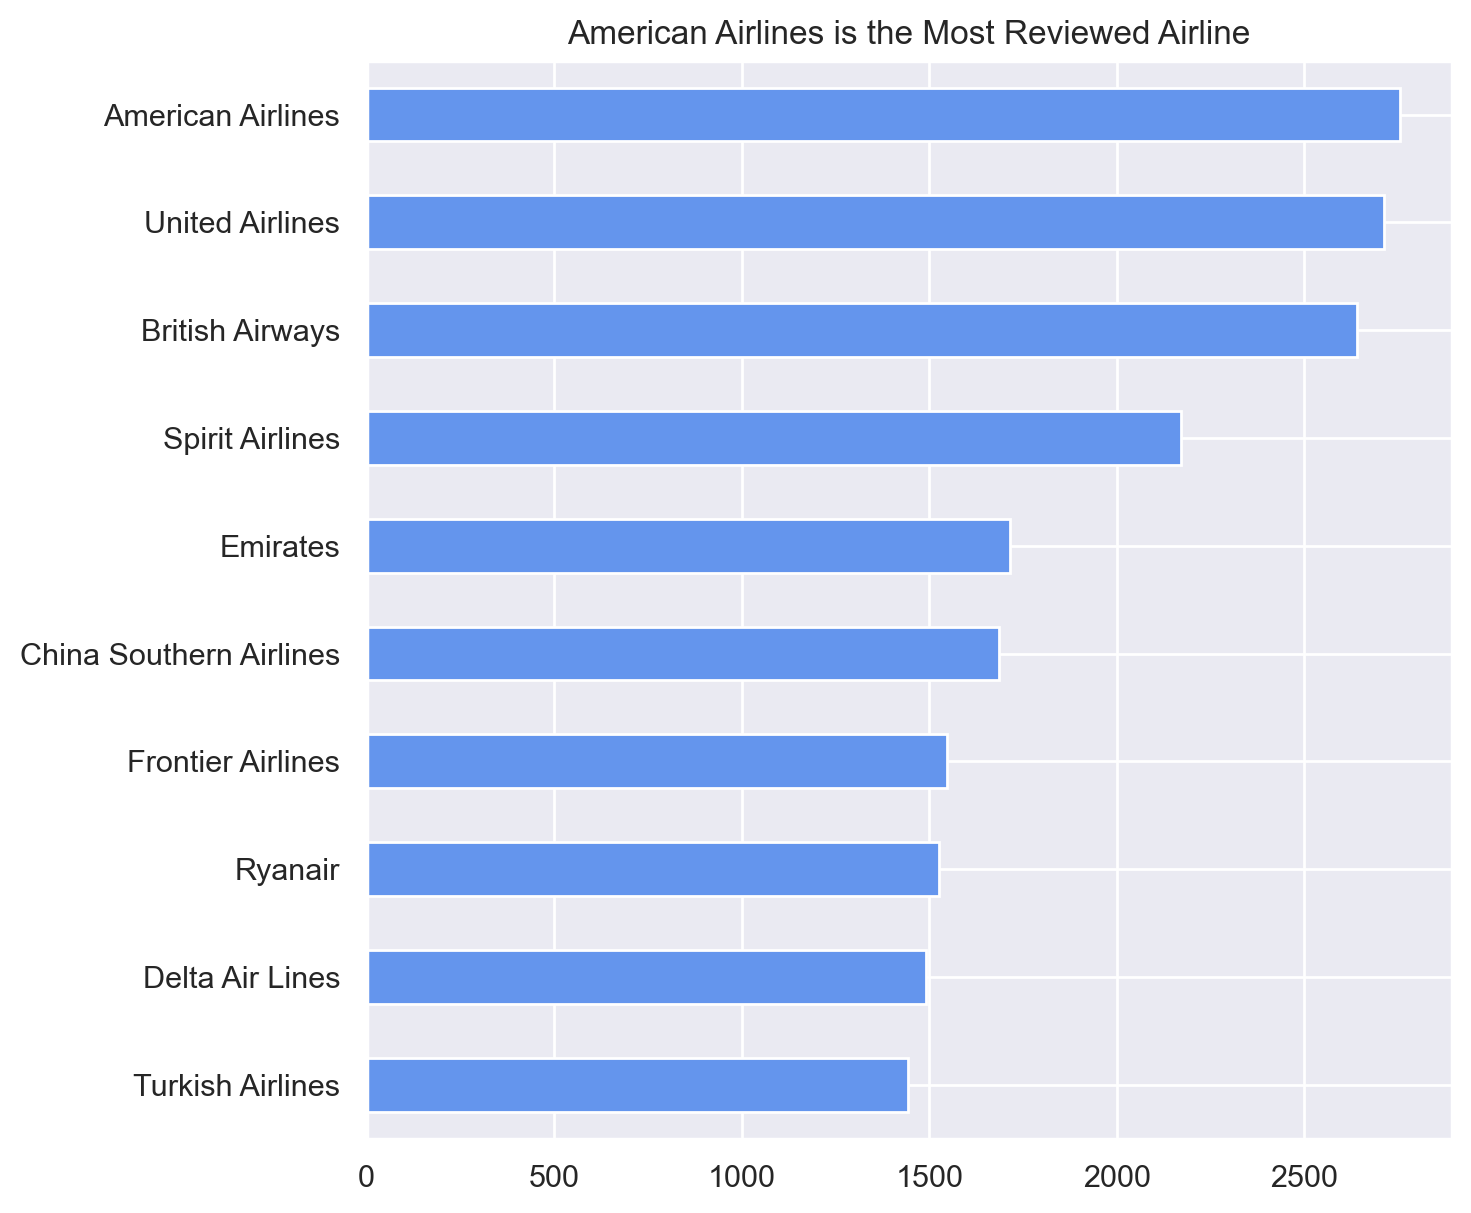

In [ ]:
plt.figure(figsize=(7, 7))

top_airlines.sort_values().plot(kind='barh', color= 'cornflowerblue')
plt.title('American Airlines is the Most Reviewed Airline')
plt.show()

**Most Reviewed Airlines:**

The graph above shows me that `American Airlines` and `United Airlines` are the airlines with the highest reviews. 

Granted, this does not say much and is quite frankly open to interpretation; these could be the most hated or the most loved airlines. In addition, 2 out of the top 3 airlines by number of reviews are all American focused, with `American Airlines` and `United Airlines` gaining popularity for their domestic flights in and around the USA. 

Again, this could mean that their passengers have a lot to complain about them or better yet have a lot of praise to say about them.

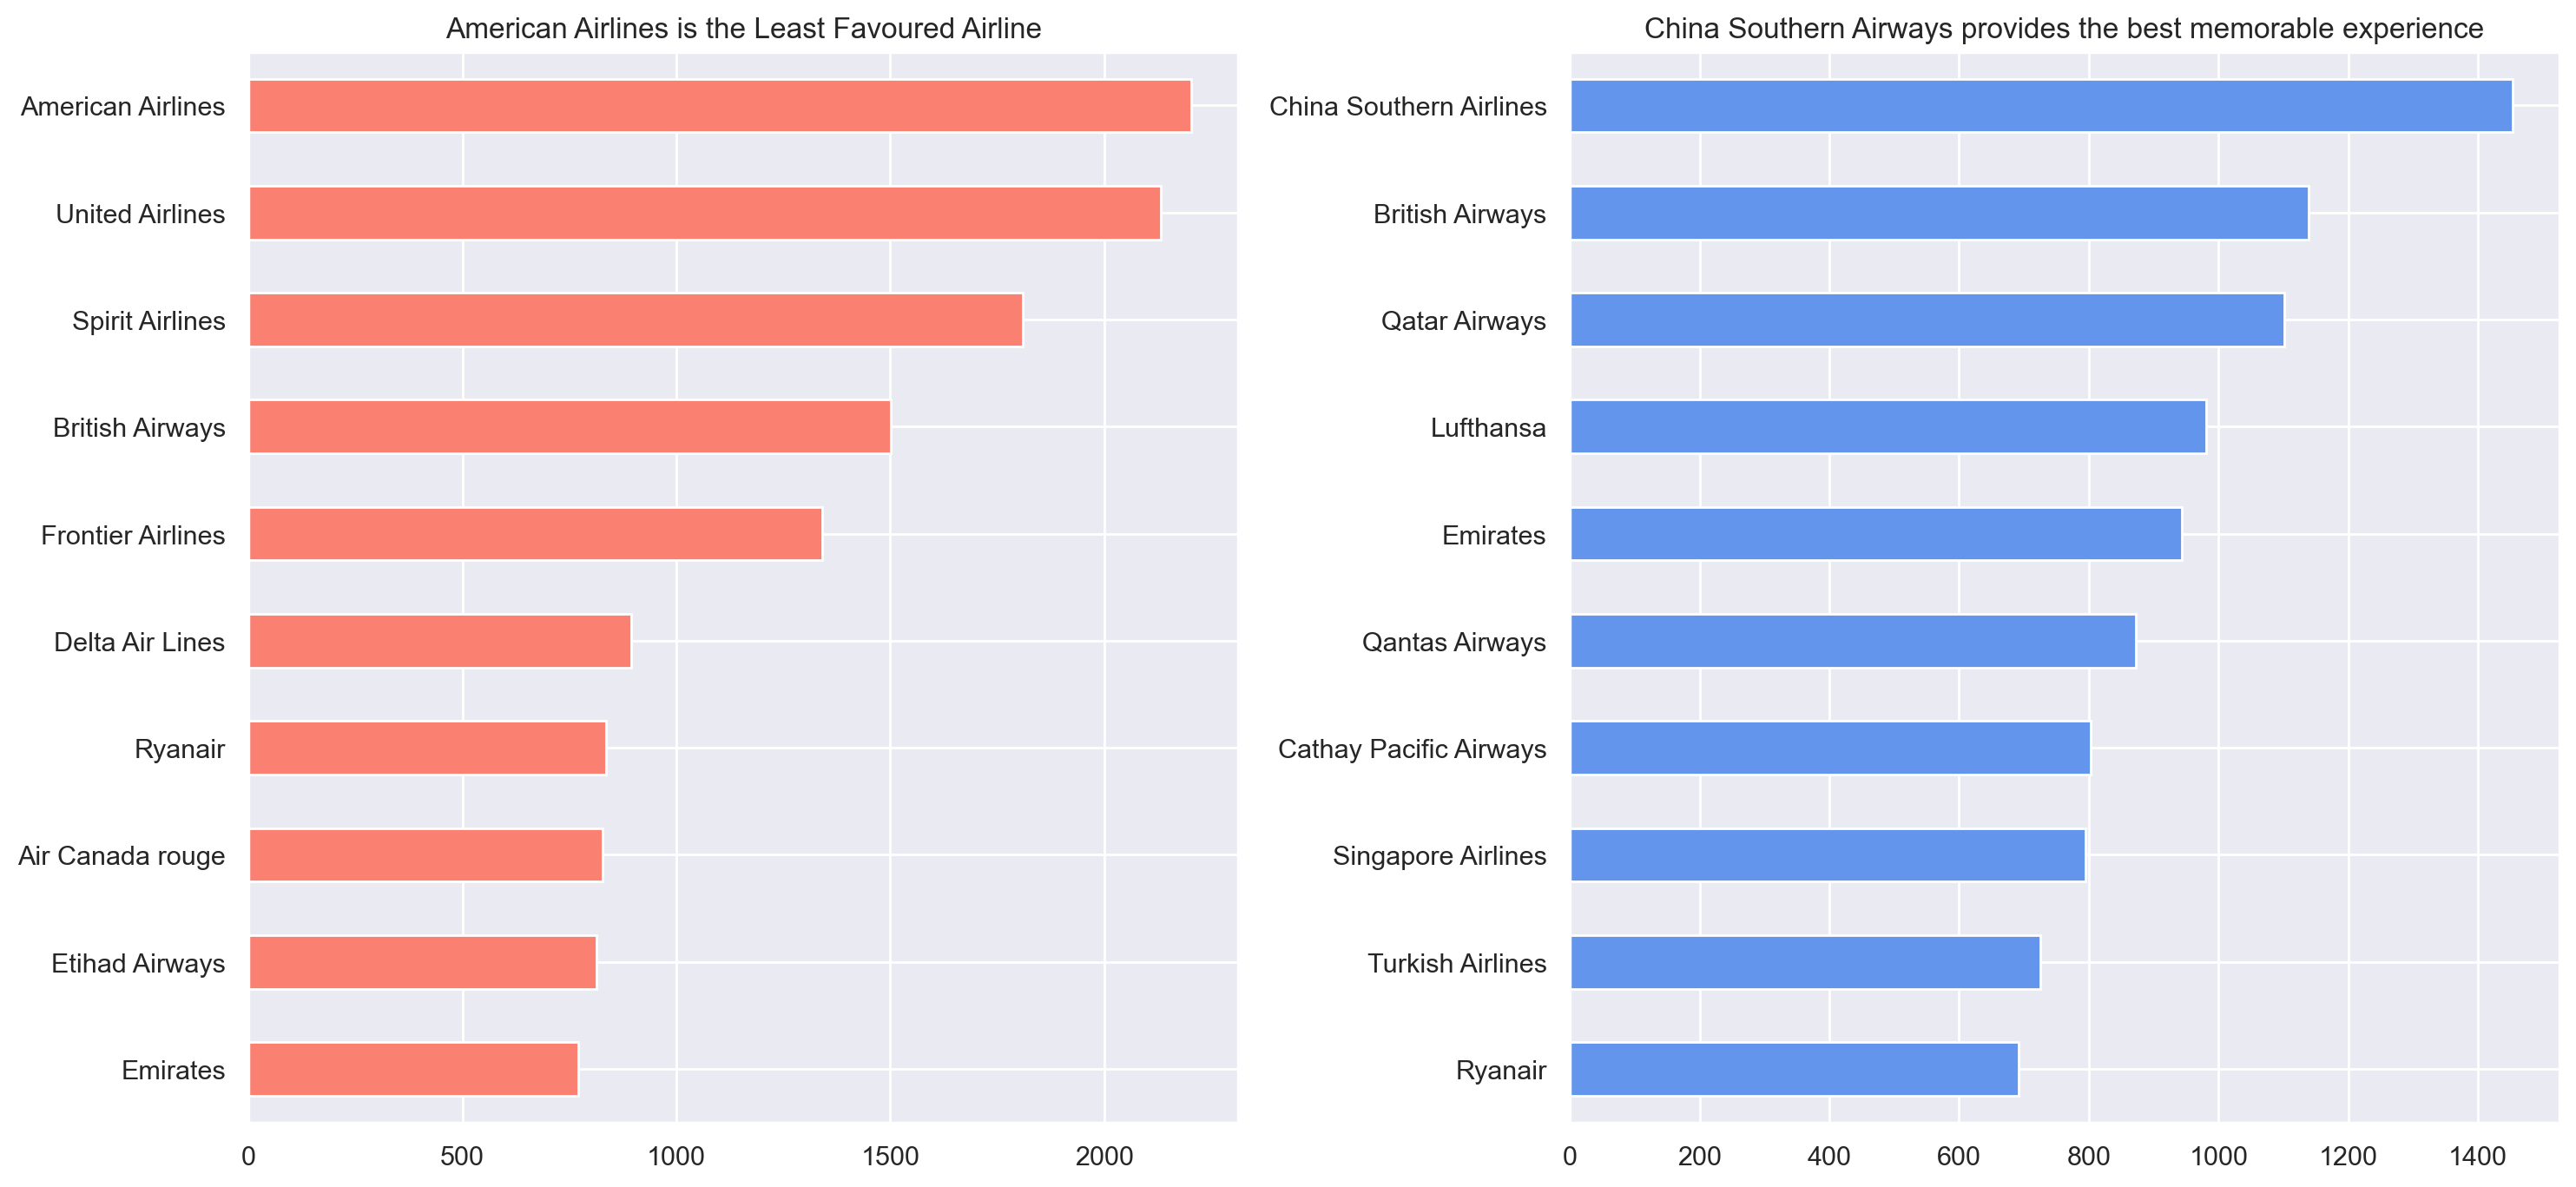

In [ ]:
plt.figure(figsize=(15,7))

plt.subplot(1, 2, 1)
most_negative_airlines.sort_values().plot(kind='barh', color='salmon',)
plt.title('American Airlines is the Least Favoured Airline')

plt.subplot(1, 2, 2)
most_positive_airlines.sort_values().plot(kind='barh', color='cornflowerblue')
plt.title('China Southern Airways provides the best memorable experience')

plt.tight_layout()
plt.show()

**Highly Favoured Ailrines:**


**Least Favoured Airlines:**

#### Distribution: Overall Rating

In [ ]:
#Summary stats
print(" Summary Statistics: Overall Rating")
cleandf['overall'].describe()

 Summary Statistics: Overall Rating


count    58699.000000
mean         5.102477
std          3.470780
min          1.000000
25%          1.000000
50%          5.000000
75%          9.000000
max         10.000000
Name: overall, dtype: float64

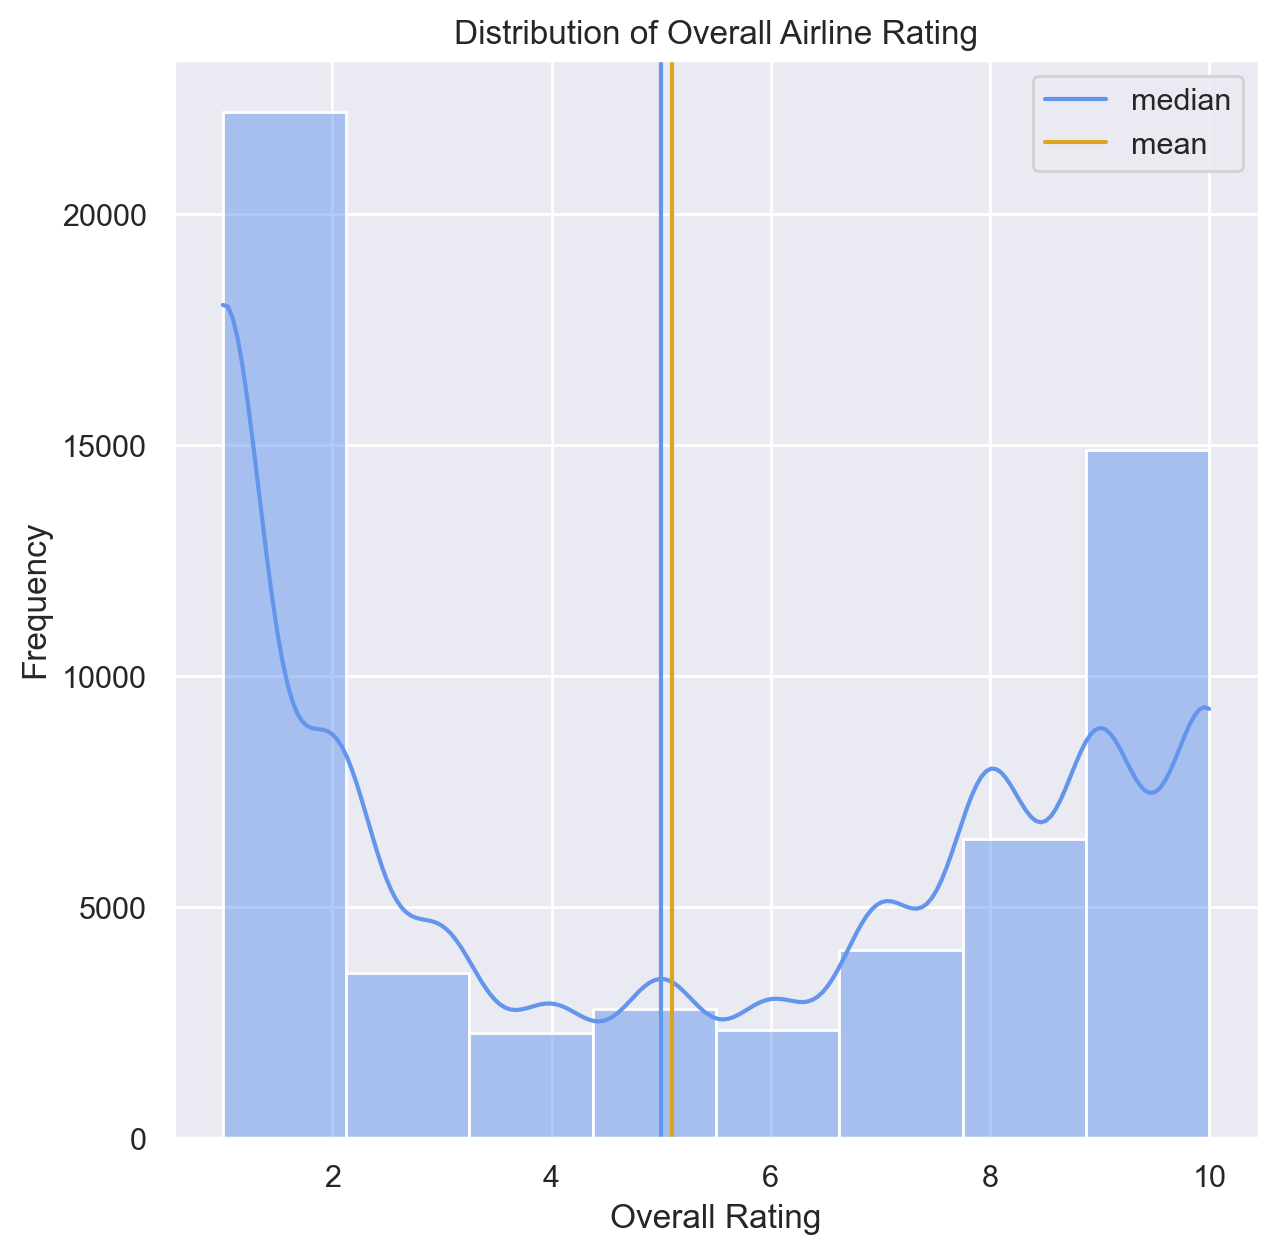

In [ ]:
#plot figure
plt.figure(figsize=(7,7))
sns.histplot(data = cleandf, x='overall', bins = 8, kde = True, color = 'cornflowerblue')

plt.axvline(cleandf['overall'].median(), label='median', color='cornflowerblue')
plt.axvline(cleandf['overall'].mean(), label='mean', color='goldenrod')

plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Overall Airline Rating')
plt.legend()
plt.show()

The distribution of the overall rating looks to be bimodal, with tails forming on the opposite ends of the scale. The average overall rating stands at 5.14, which is shown by a yellow line.

The average appears to stay in the middle naturally as the review scores rande from 1 to 10. The median overall rating can be found to the left of the mean, shown by the blue line at around 5.



#### Relationship between *`overall`* ratings and other numerical columns

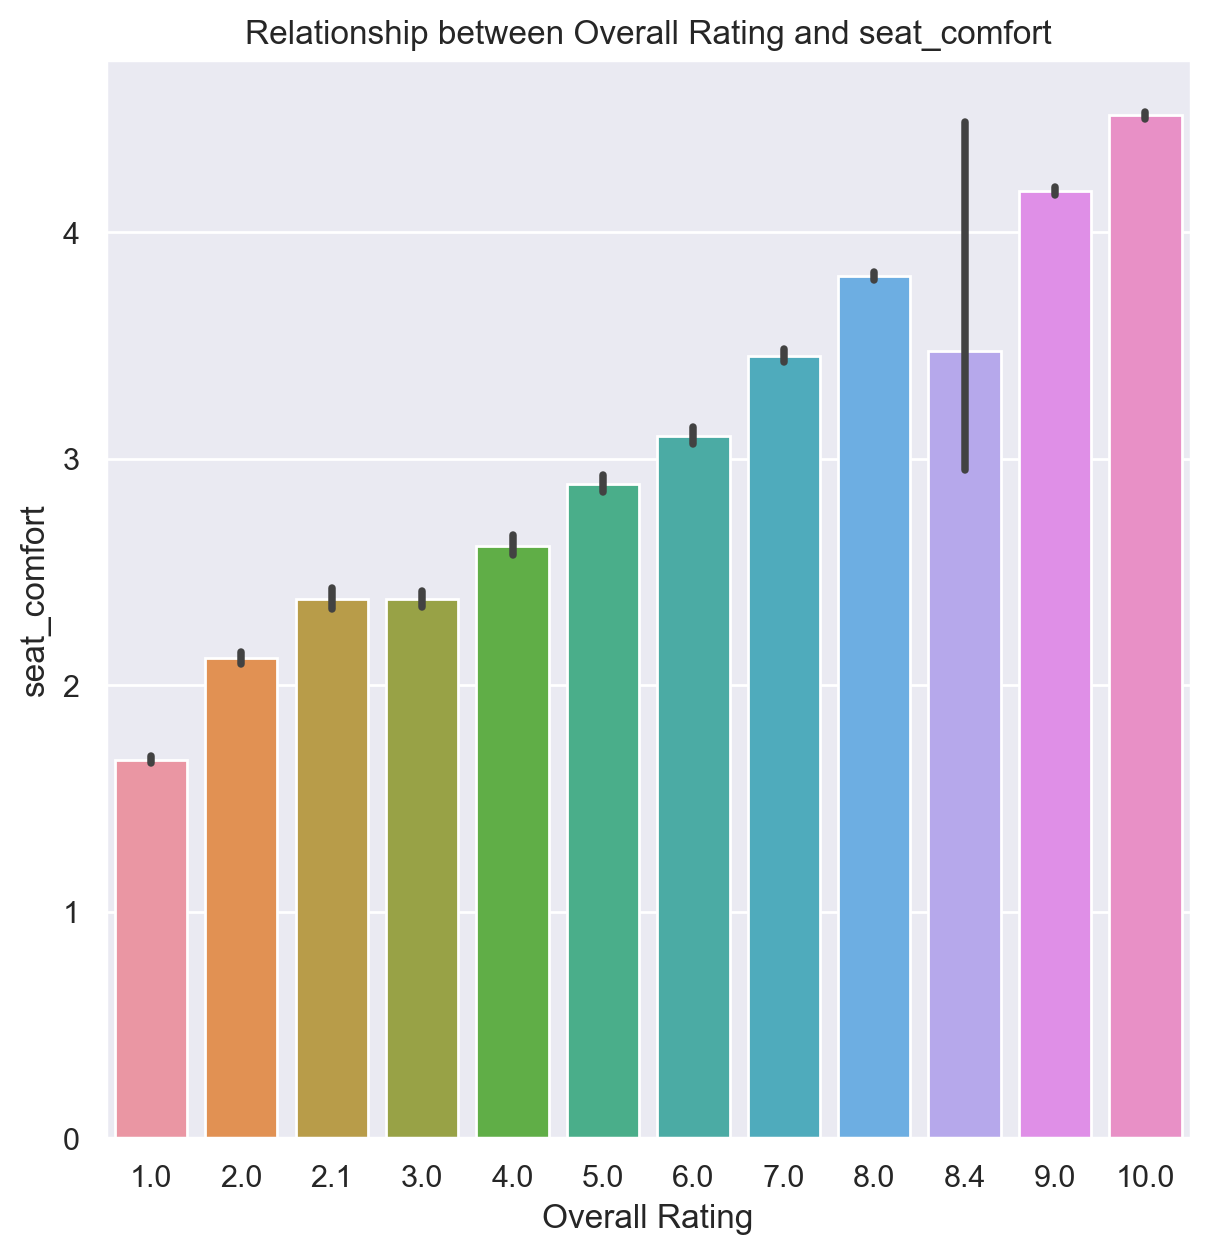

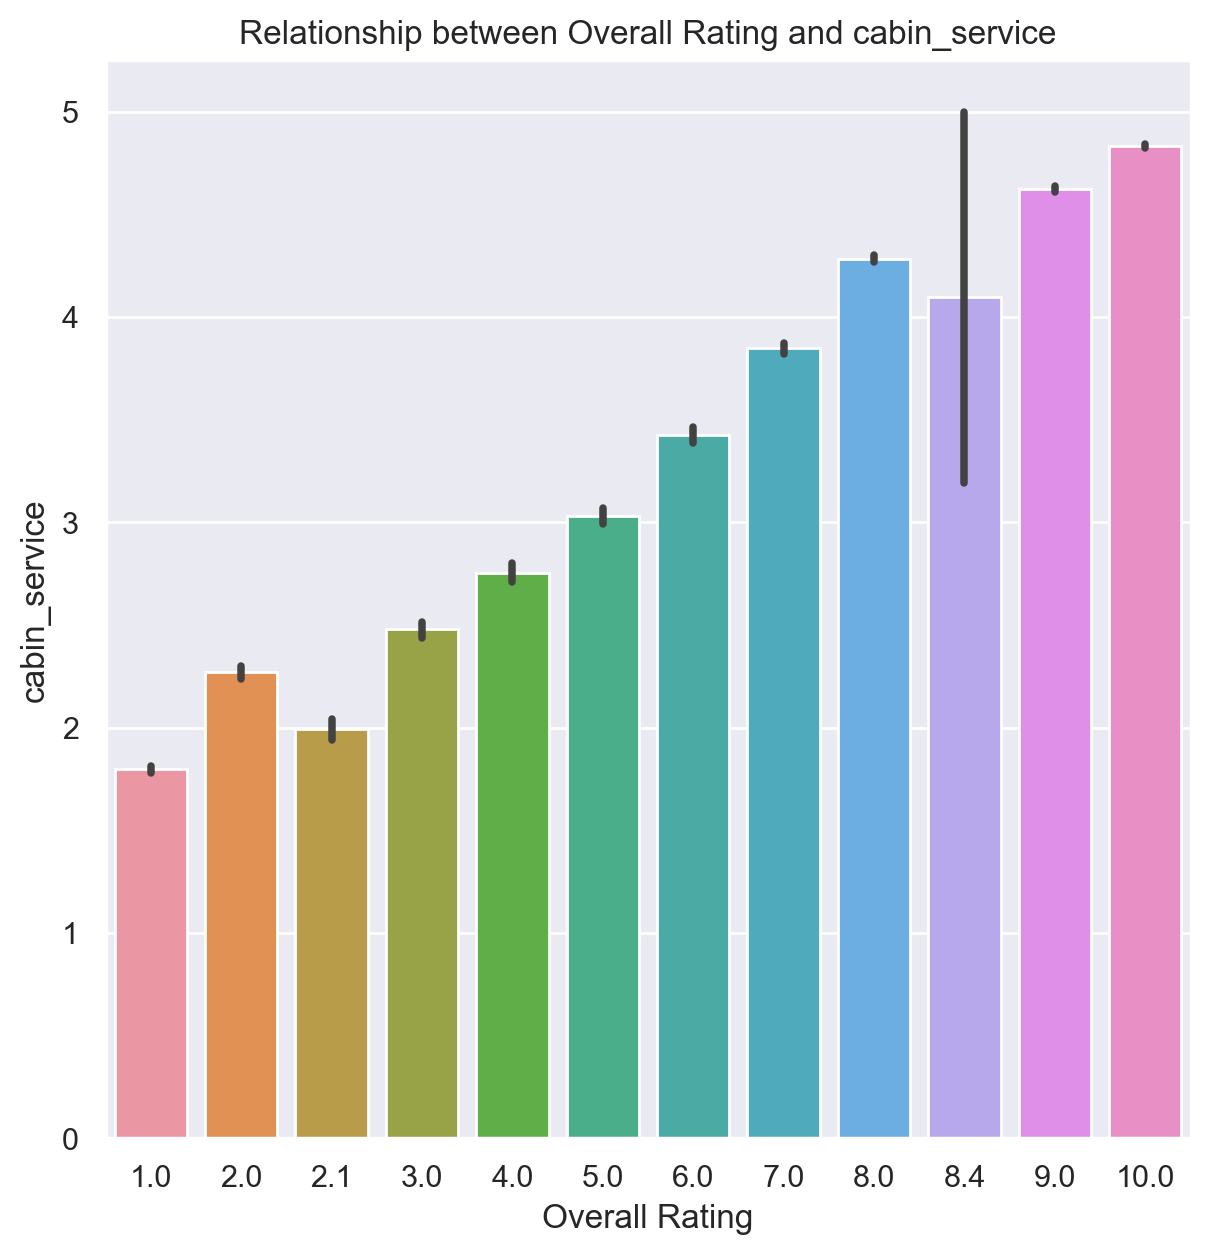

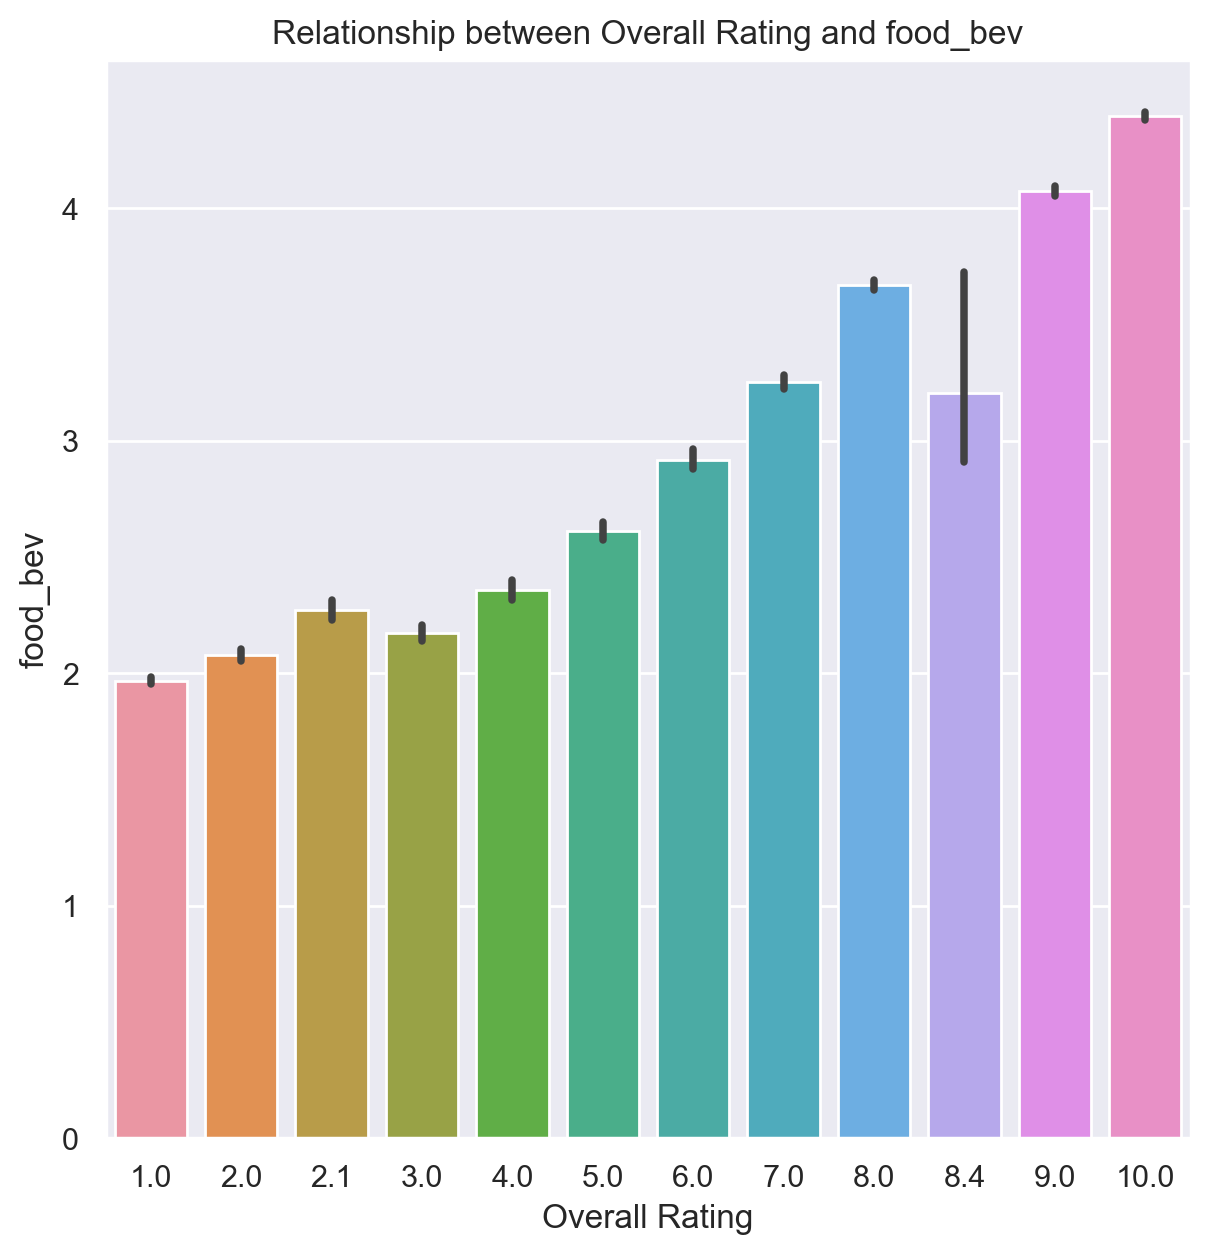

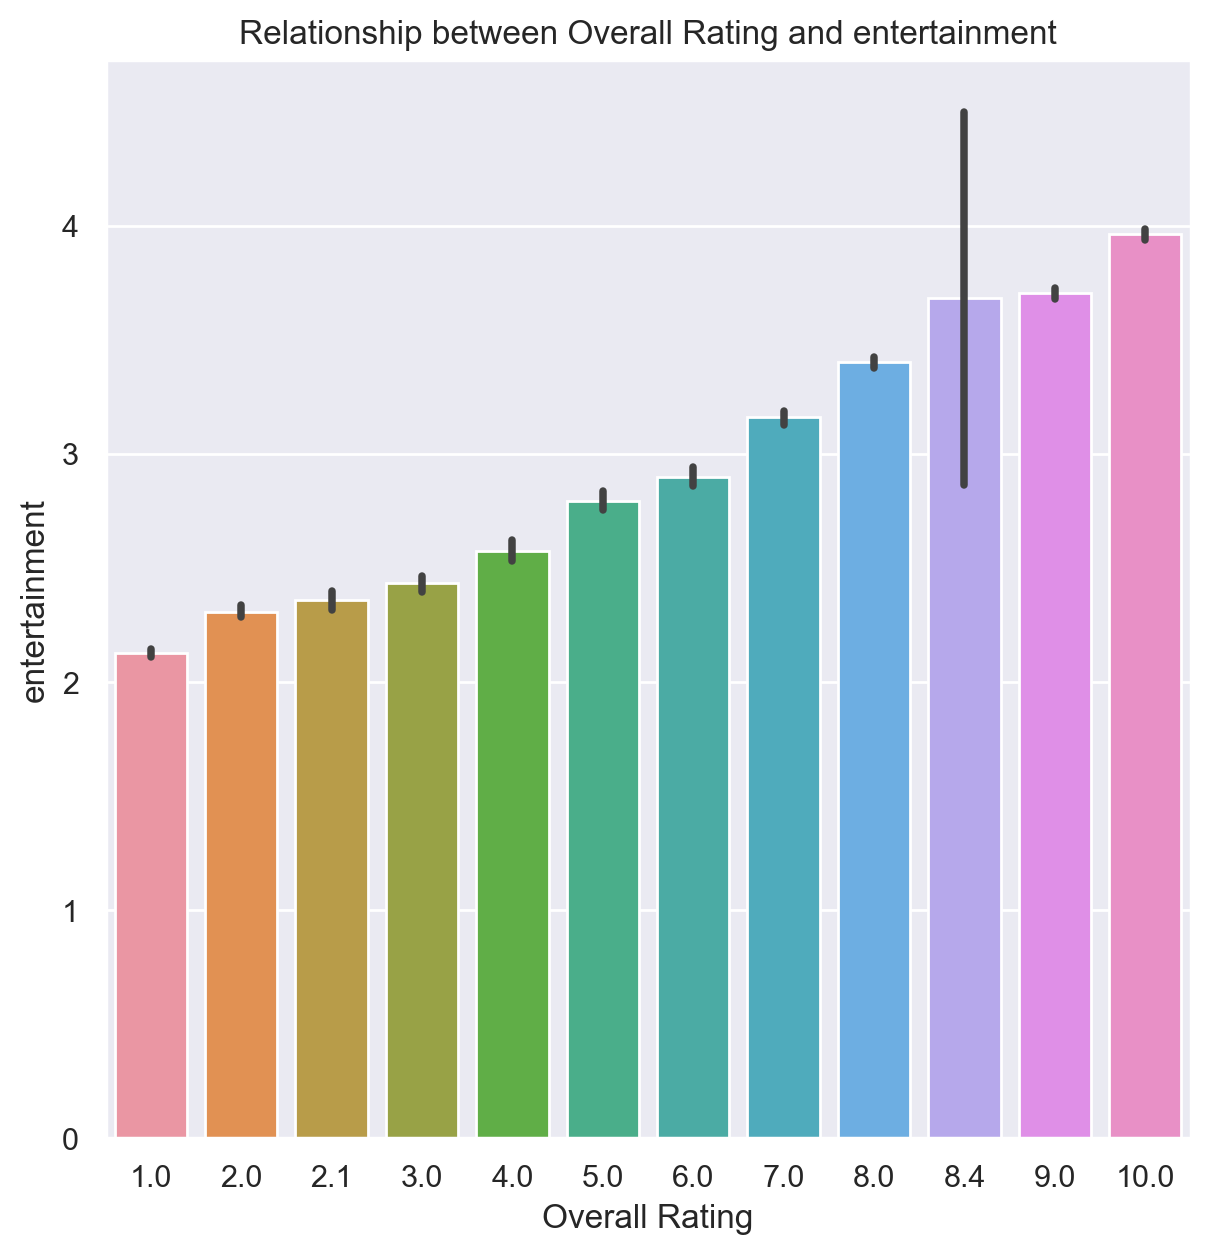

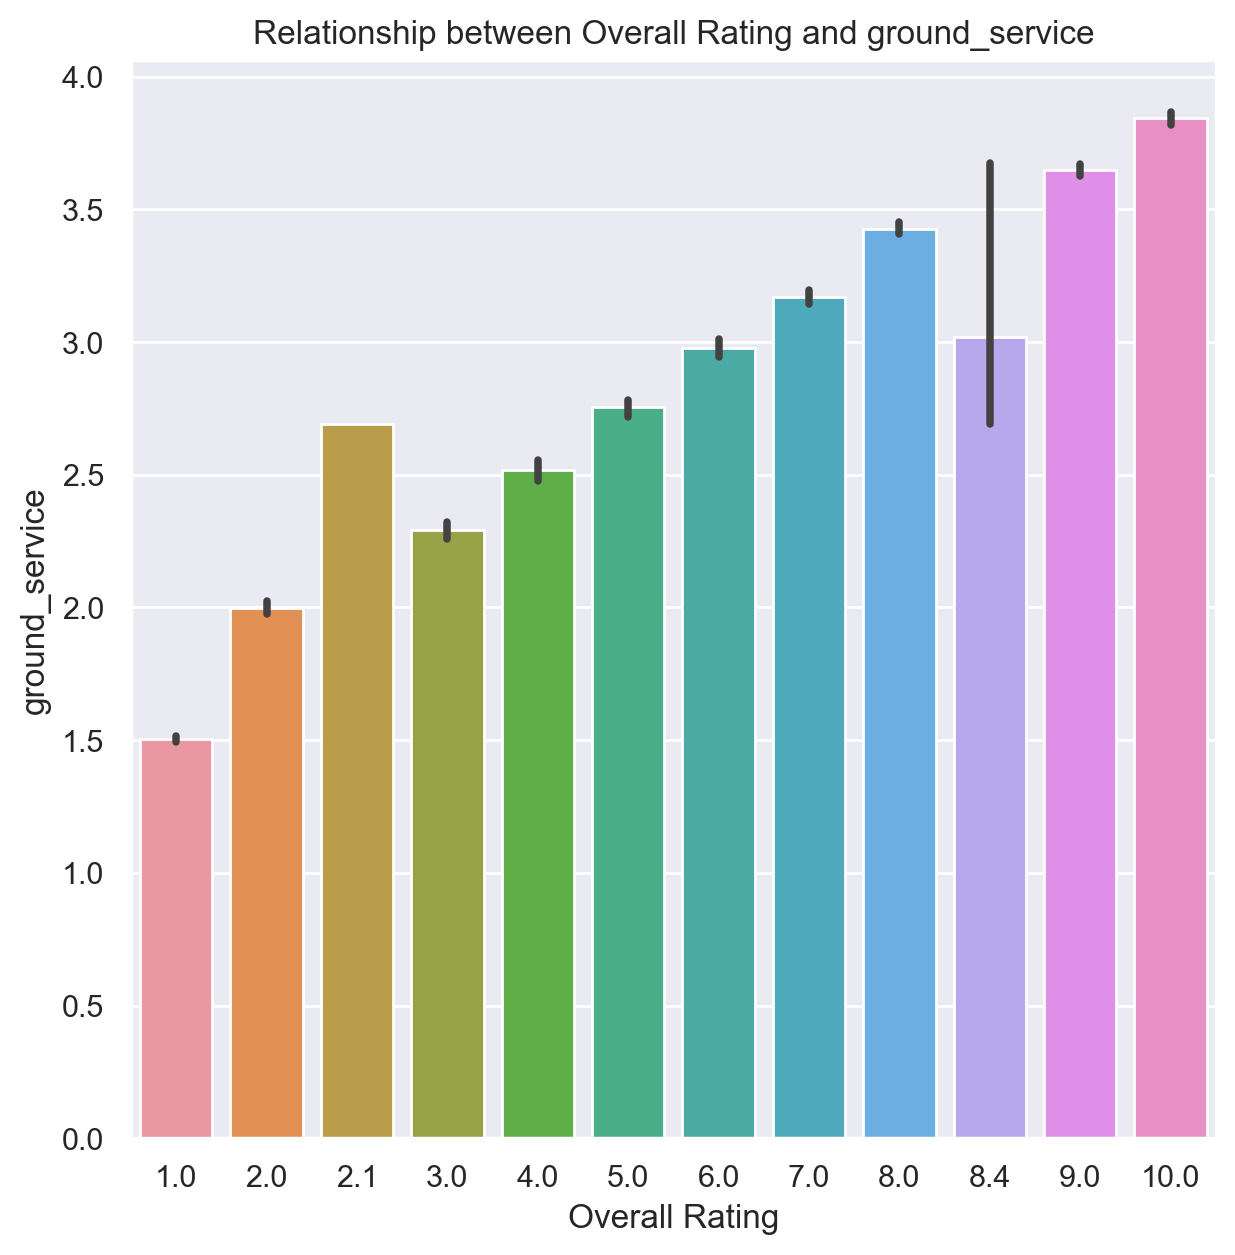

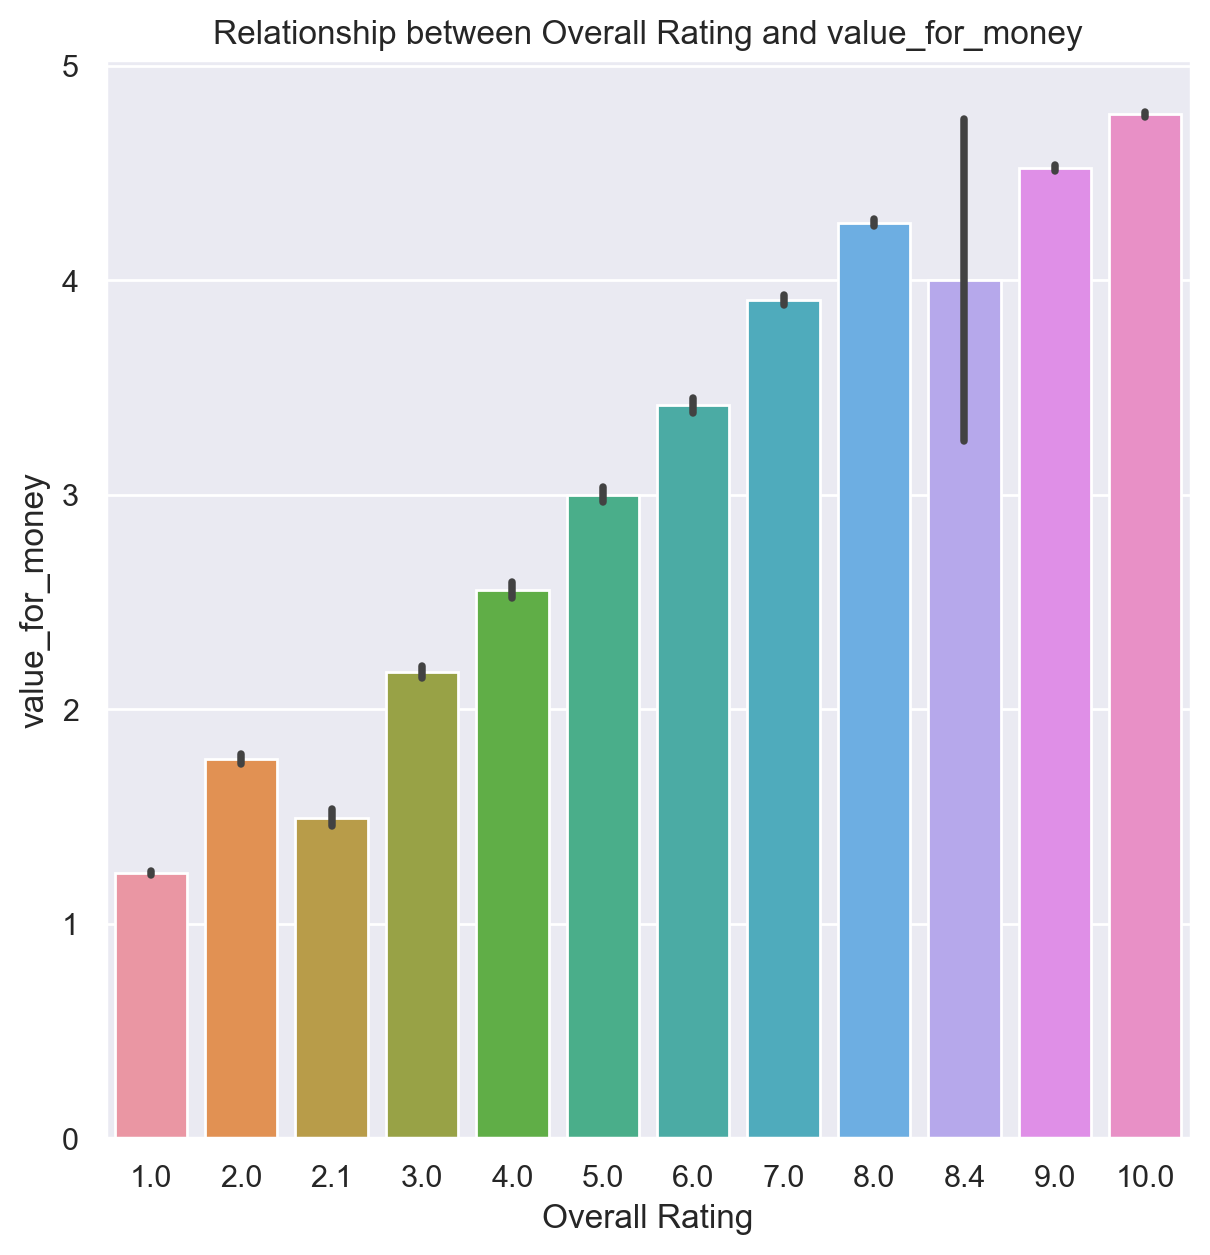

In [ ]:
num_columns = cleandf[['seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money']]
for col in num_columns:
    plt.figure(figsize=(7, 7))
    sns.barplot(x='overall', y=col, data=cleandf)
    plt.title(f'Relationship between Overall Rating and {col}')
    plt.xlabel('Overall Rating')
    plt.ylabel(col)
    plt.show()

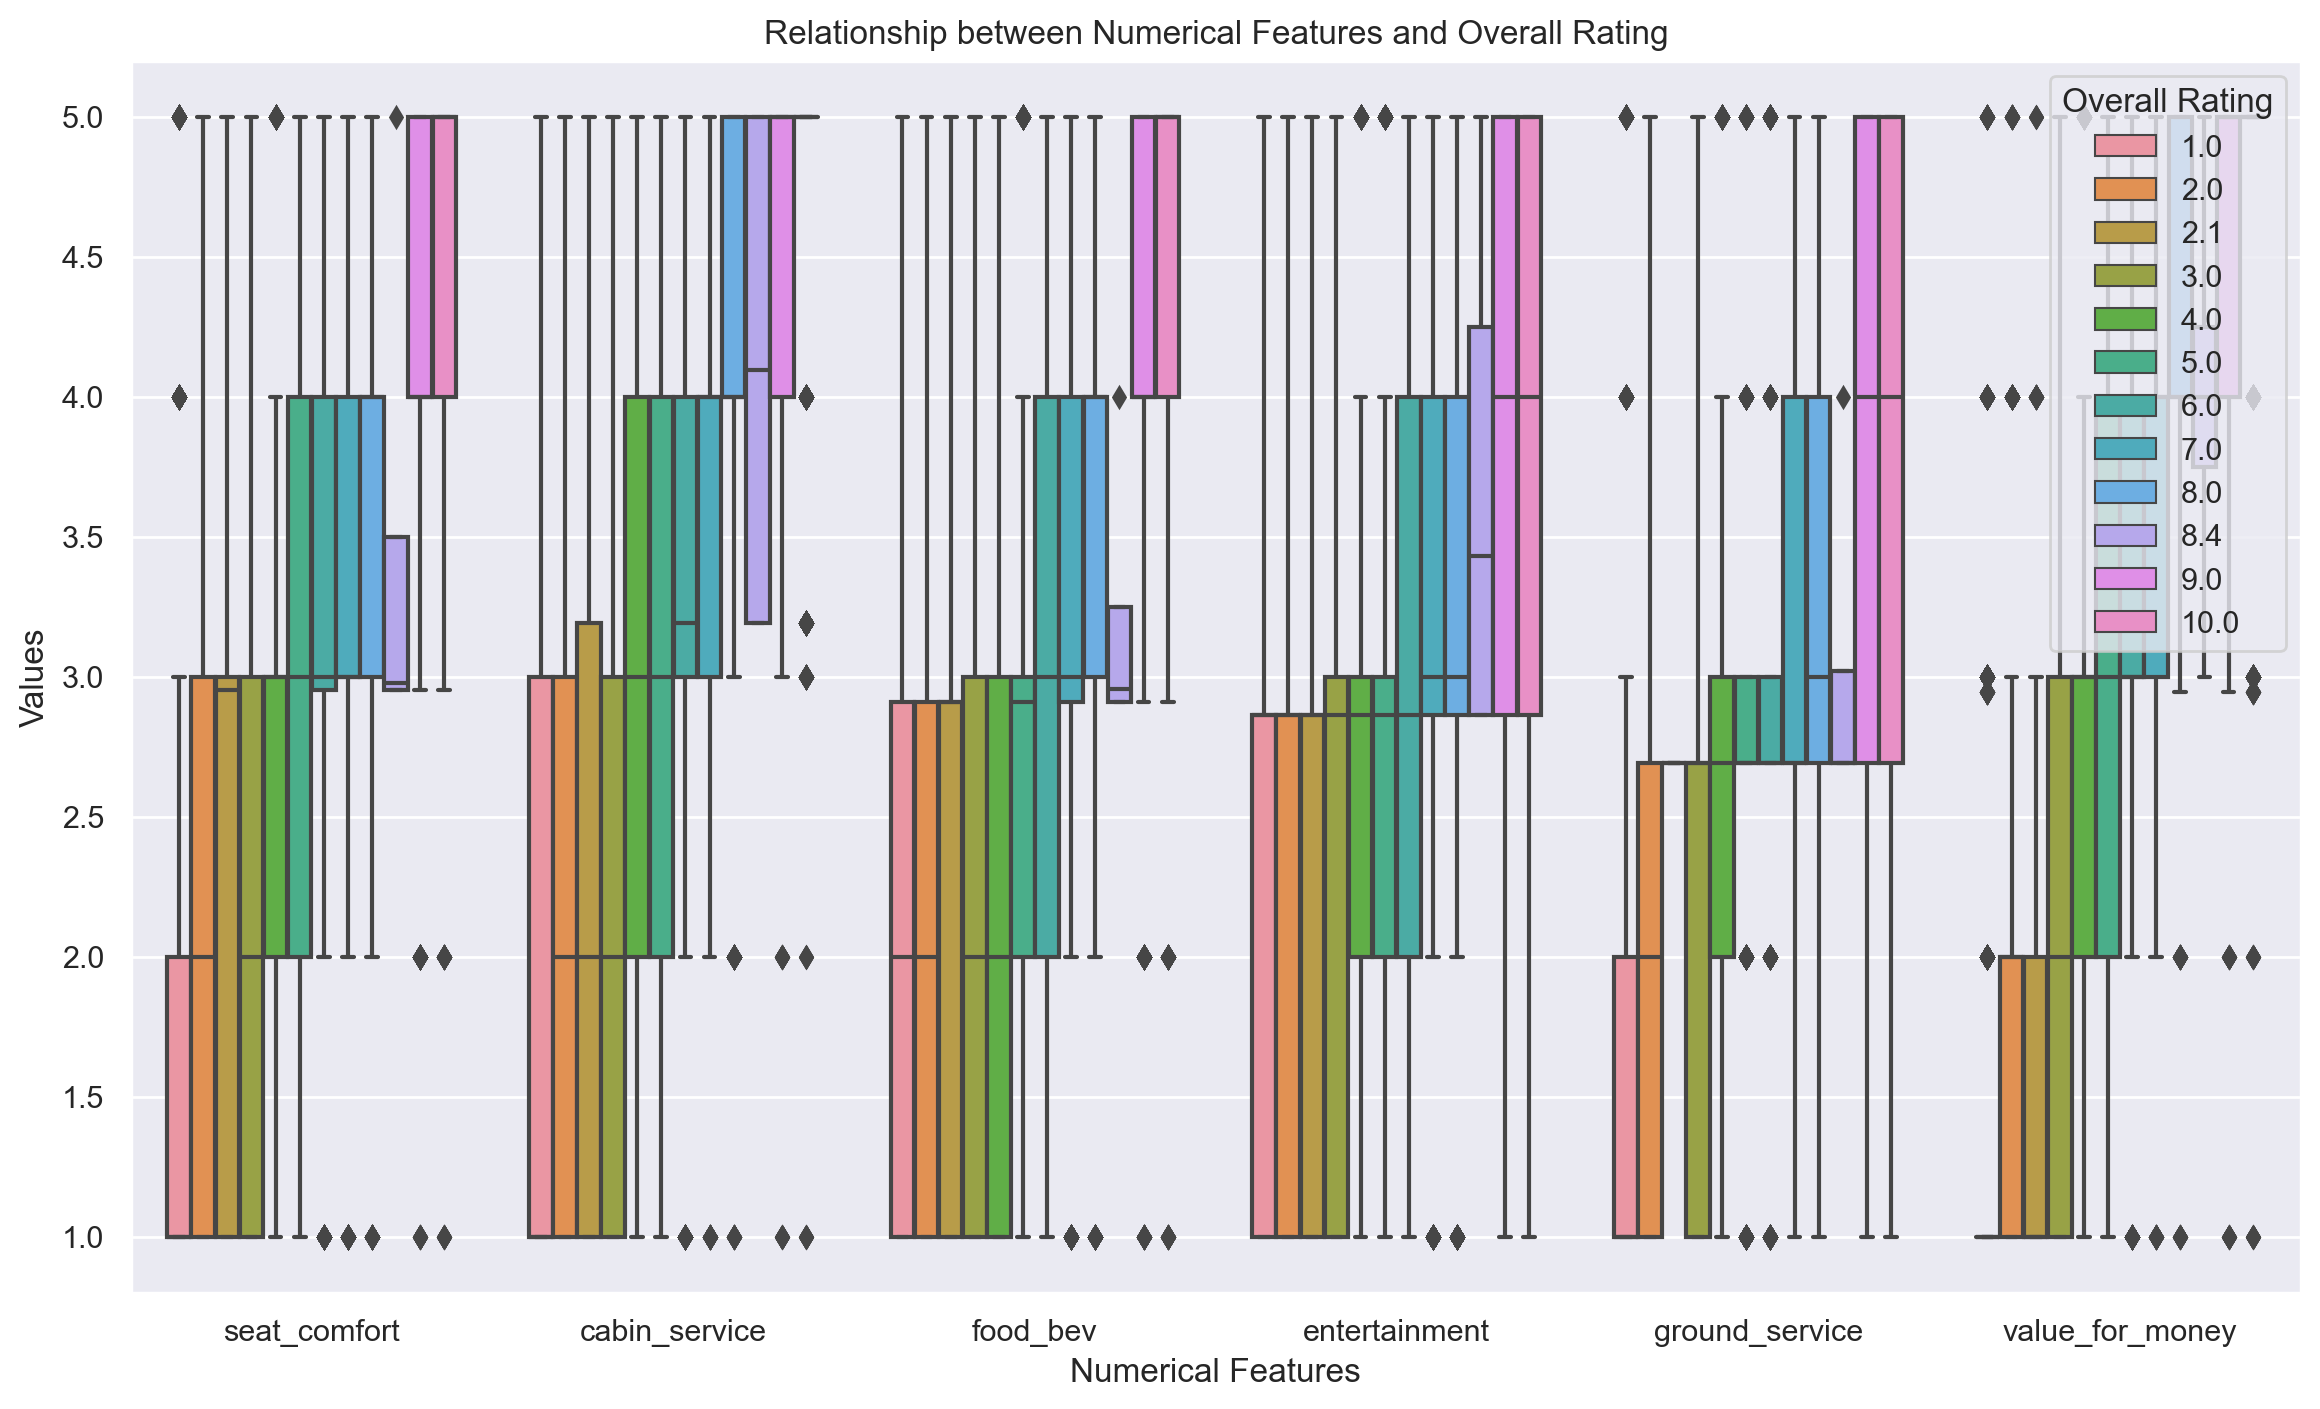

In [ ]:
# Melt the DataFrame to a long format suitable for box plots
melted_df = pd.melt(cleandf, id_vars='overall', value_vars=['seat_comfort', 'cabin_service', 'food_bev', 'entertainment', 'ground_service', 'value_for_money'])

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Create a box plot using seaborn
sns.boxplot(x='variable', y='value', hue='overall', data=melted_df)

# Customize the plot
plt.xlabel('Numerical Features')
plt.ylabel('Values')
plt.title('Relationship between Numerical Features and Overall Rating')
plt.legend(title='Overall Rating', loc='upper right')

# Show the plot
plt.show()

#### Distribution of reviews by year

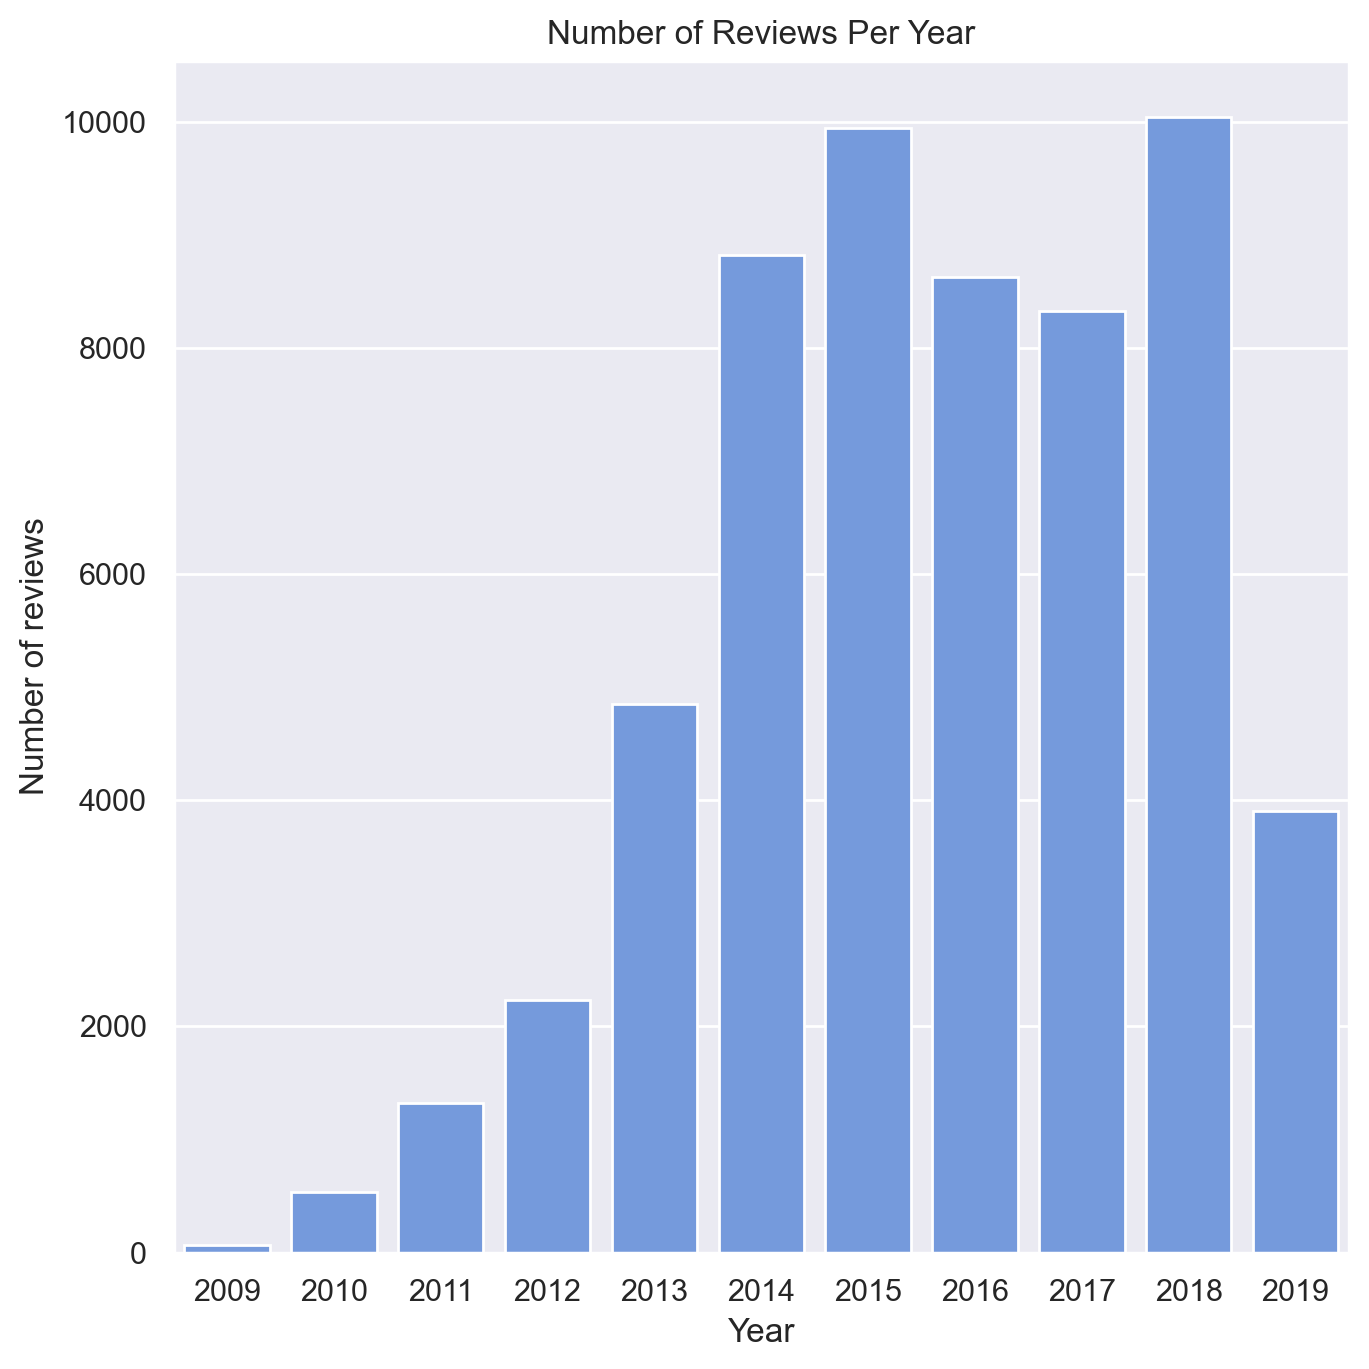

In [ ]:
# plot figure
plt.figure(figsize=(7,7))
sns.set_theme(style="darkgrid")
sns.countplot(x="review_year", data=cleandf, color='cornflowerblue')
plt.xlabel("Year")
plt.ylabel("Number of reviews")
plt.title("Number of Reviews Per Year")
plt.tight_layout()
plt.show()

From 2002 to 2008, the number of reviews were pretty much non-existent, popularity of reviews became more prominent circa 2009, even at that time it was still very minimal. 

It is very possible that this is due to the unpopularity of Skytrax with the existence of TrustPilot, Yelp etc. Reviews started to pick up from 2010 onwards, although not massive spikes, but gradual growth.

Next we will explore the distribution of ratings by month.

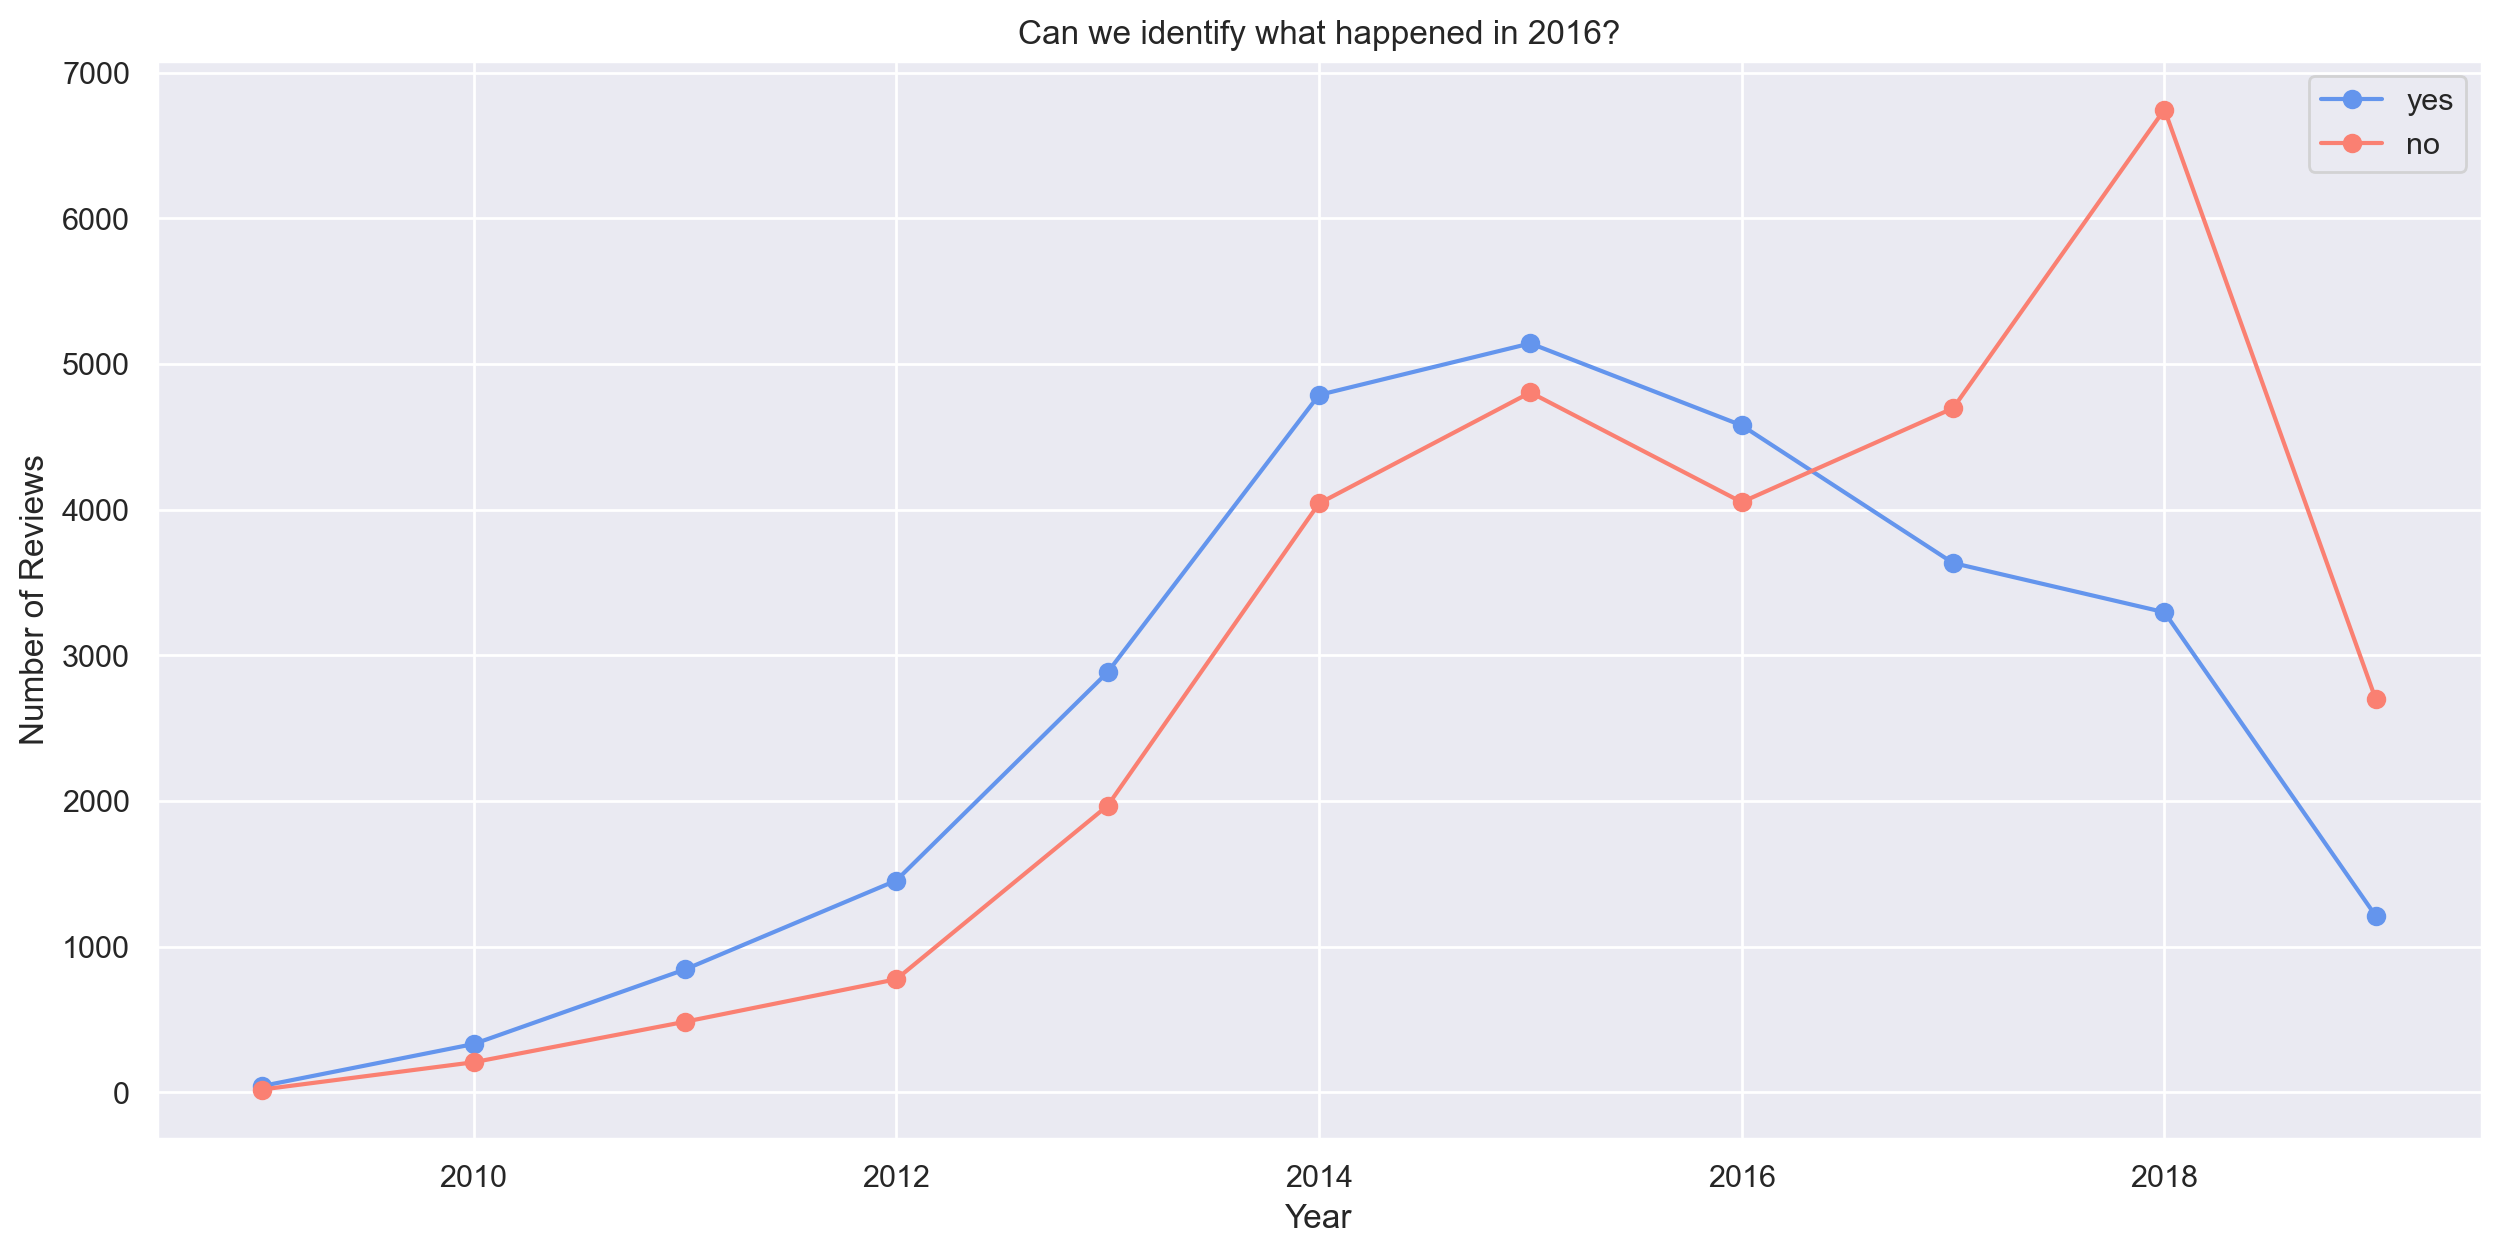

In [ ]:
reviews_per_year = cleandf.groupby(['review_year', 'recommended']).size().unstack()

# Plotting positive and negative reviews per year in subplots
plt.figure(figsize=(15, 7))

# Subplot for positive reviews
# plt.subplot(1, 2, 1)
reviews_per_year['yes'].plot(kind='line', color='cornflowerblue', marker= 'o')
reviews_per_year['no'].plot(kind='line', color='salmon', marker= 'o')
plt.title('Can we identify what happened in 2016?')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend()

# Subplot for negative reviews
# plt.subplot(1, 2, 2)
# reviews_per_year['no'] .plot(kind='bar', color='salmon')
# plt.title('2018 accumulated the most negative reviews')
# plt.xlabel('Year')
# plt.ylabel('Number of Reviews')

# plt.tight_layout()
plt.show()

#### Distribution of Reviews By Month

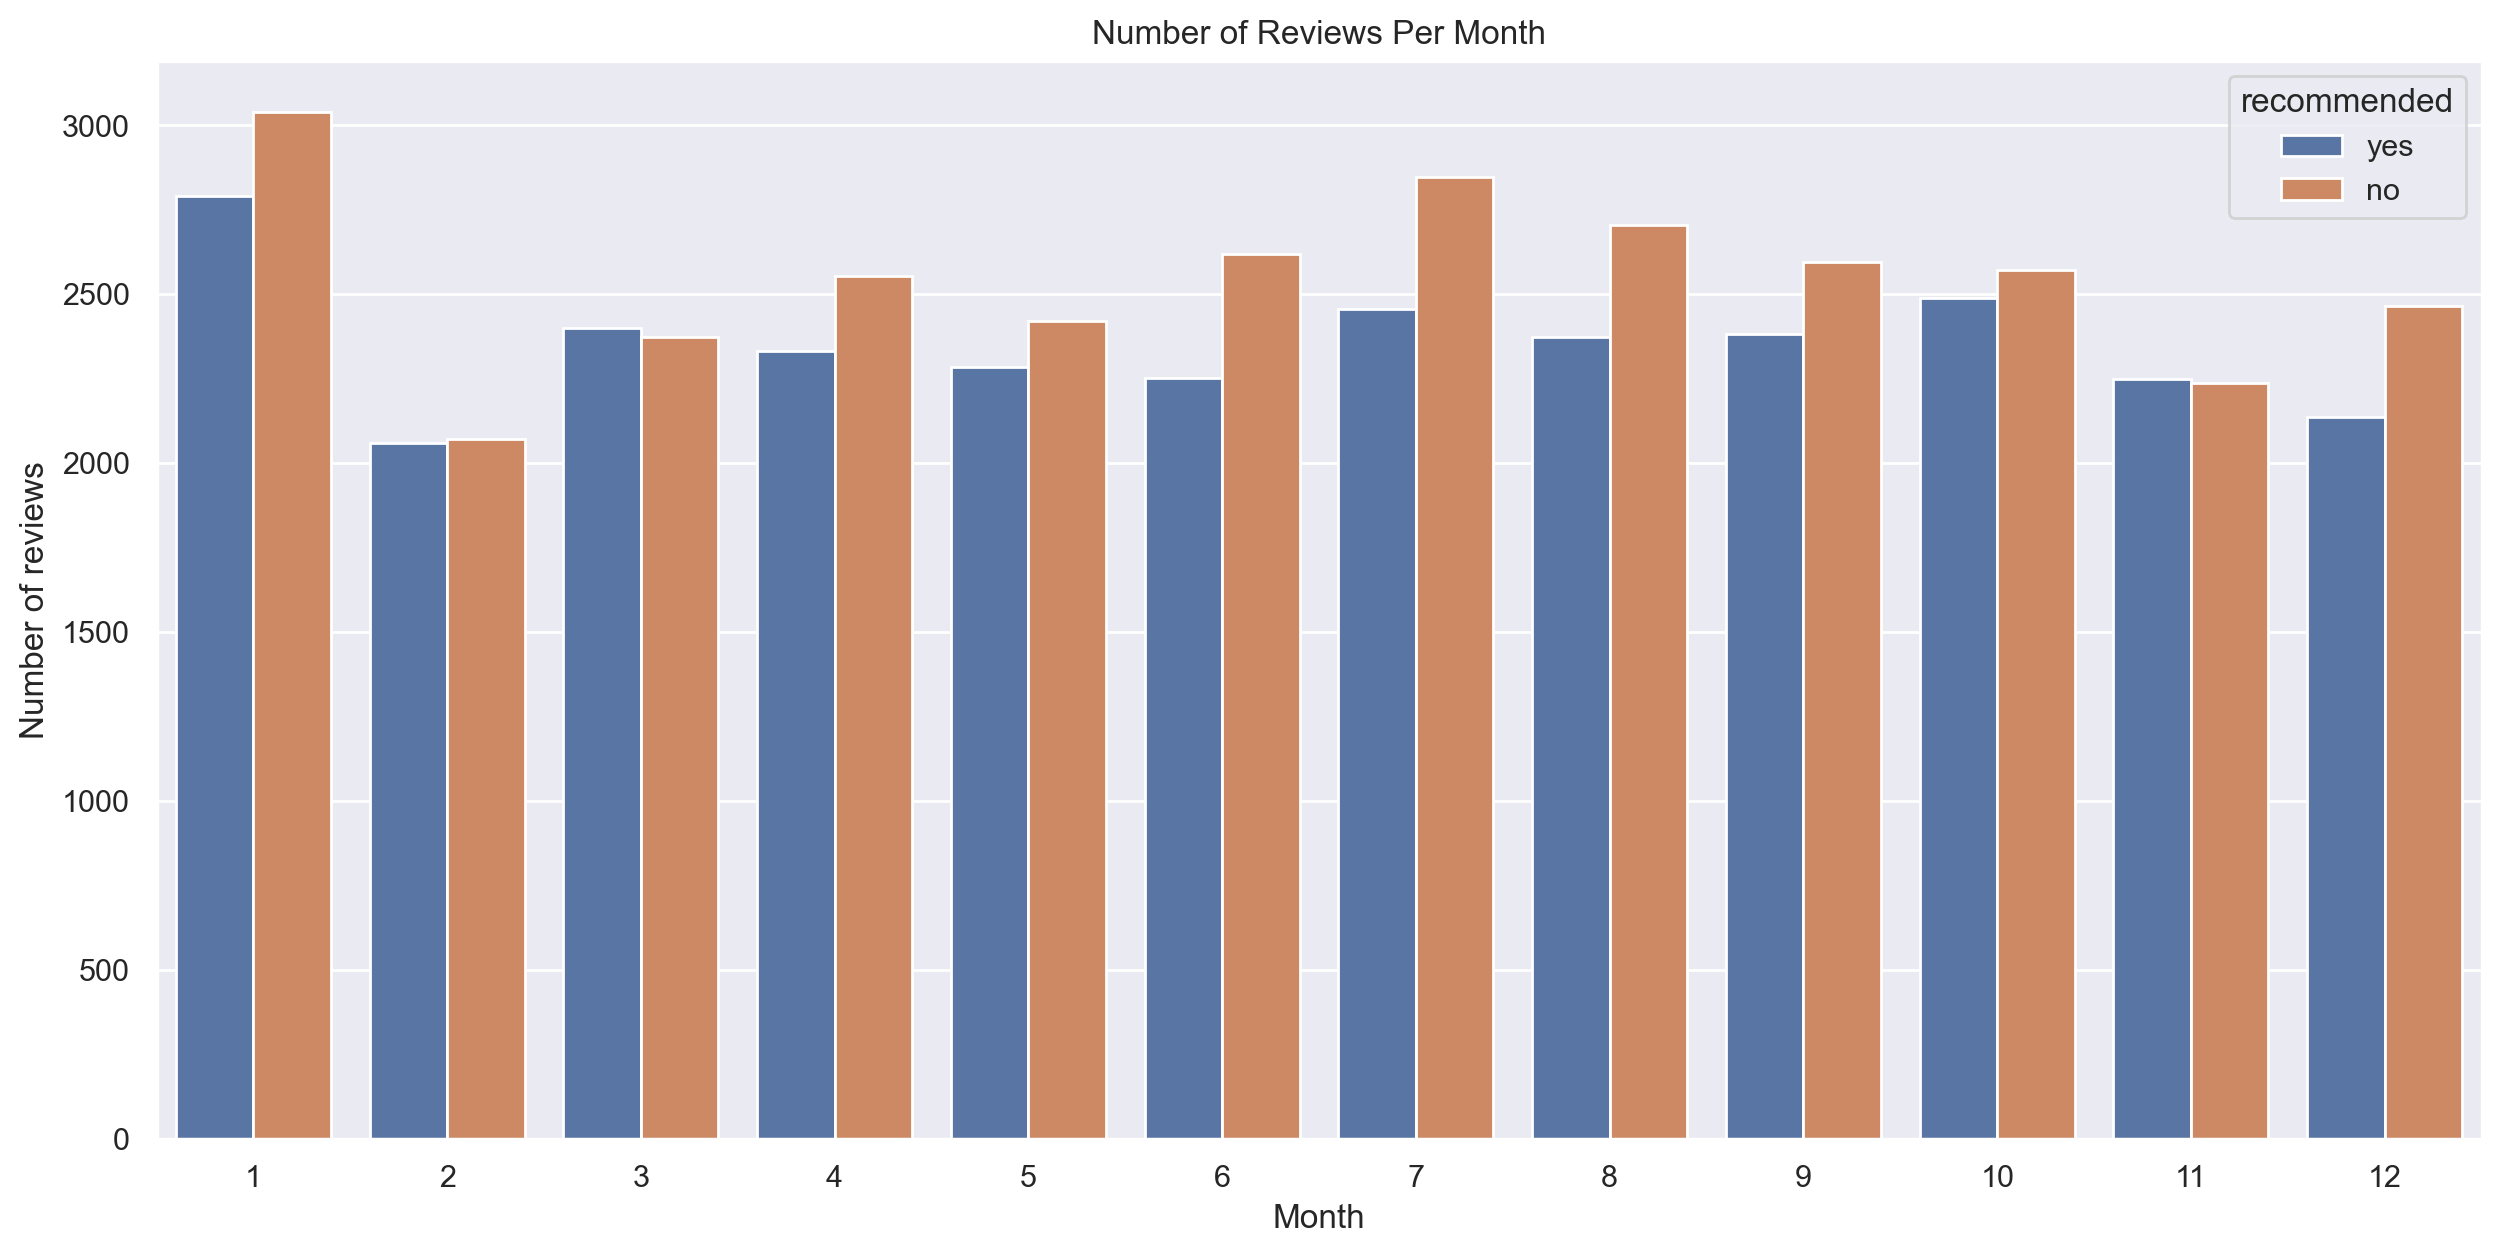

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(x="review_month", data=cleandf, hue='recommended')
plt.xlabel("Month")
plt.ylabel("Number of reviews")
plt.title("Number of Reviews Per Month")
plt.show()

Looking at the month for reviews, it seems fairly even all year round, with the lowest amounts of reviews in February. 

It is possible due to the seasonal factors that affect airline operations i.e. weather preventing the regular volume of flights. If passengers cant get on a flight, they will have no experience to review about.

#### Distribution of Cabin Classes

In [ ]:
cleandf.columns

Index(['airline', 'overall', 'author', 'customer_review', 'cabin',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended', 'review_year',
       'review_month'],
      dtype='object')

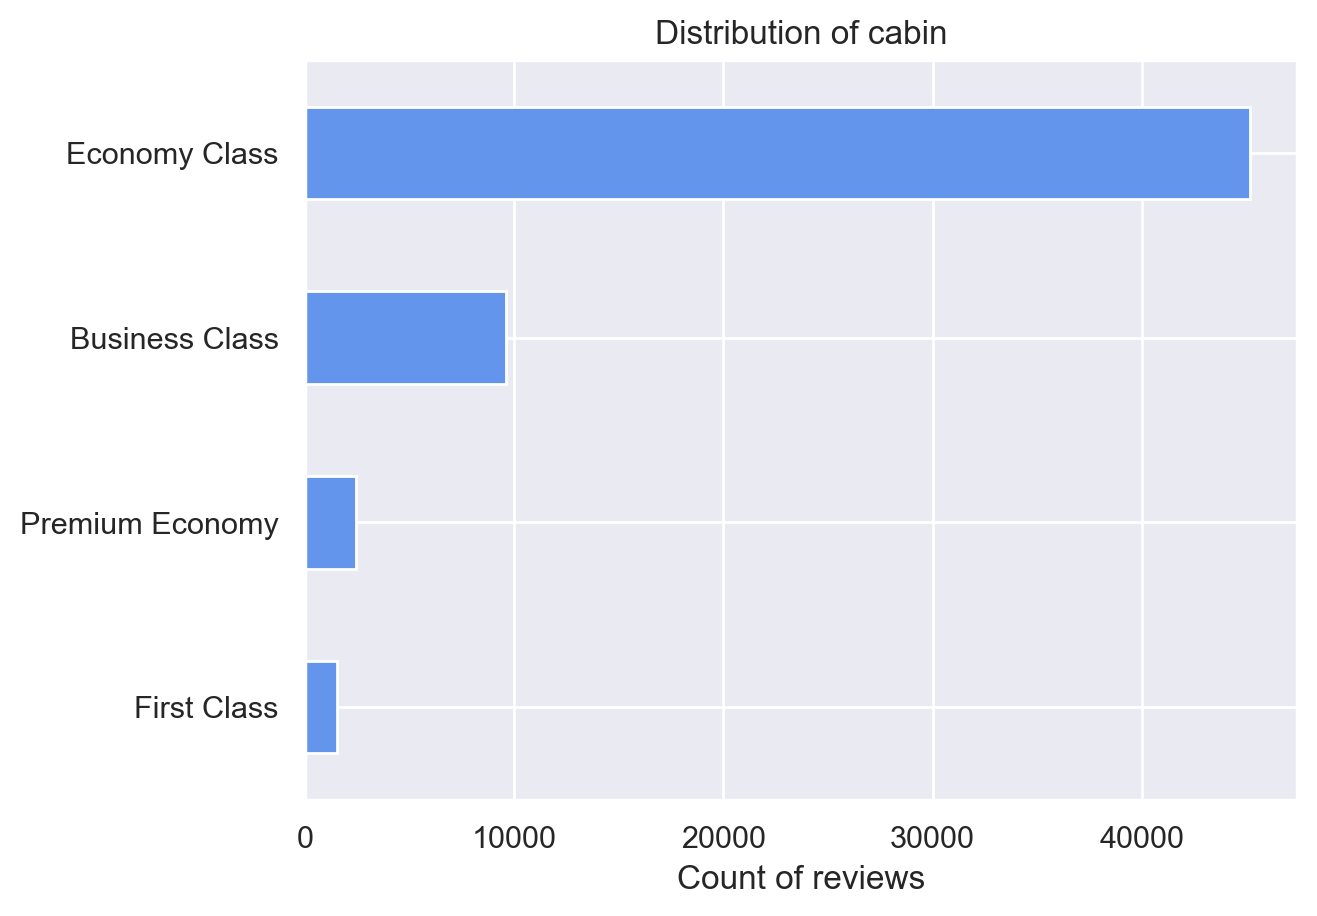

In [ ]:
cleandf['cabin'].value_counts().sort_values().plot(kind='barh', color= 'cornflowerblue')
plt.xlabel("Count of reviews")
plt.title("Distribution of cabin")
plt.show()

We can see here that the most prominent class in this dataset for reviews is the `Economy` class. Seeing as this is the default cabin class, naturally there would be more passengers who would've expereinced an Economy experience and therefore may or may not have had a lot to say to put into reviews.

In [ ]:
numdf = cleandf.select_dtypes(exclude='object')

In [ ]:
# plt.figure(figsize=(10,8))
# sns.heatmap(data=numdf, annot=True, cmap="crest")
# plt.title("Correlation between numerical figures")
# # plt.show()

As expected, the ratings for respective categories are positively correlated with the overall rating column. This is great insight as it draws us closer to what a passenger would judge a positive experience on, and vice versa.

Our next step would be to look into the text data, run some sentiment analysis to fully distinguish between positive and negative reviews.

Now that we have had a look at the numerical data, we will next look at the text-based data. As mentioned in the previous notebook, we are working on a model to predict sentiment; a classification model on airline reviews, therefore, we would need to make an emphasis on text data.§

#### Exploring Text Data

In [ ]:
cleandf['customer_review'].apply(len).describe()

count    58699.000000
mean       753.869981
std        504.093933
min         71.000000
25%        410.000000
50%        618.000000
75%        938.000000
max       5356.000000
Name: customer_review, dtype: float64

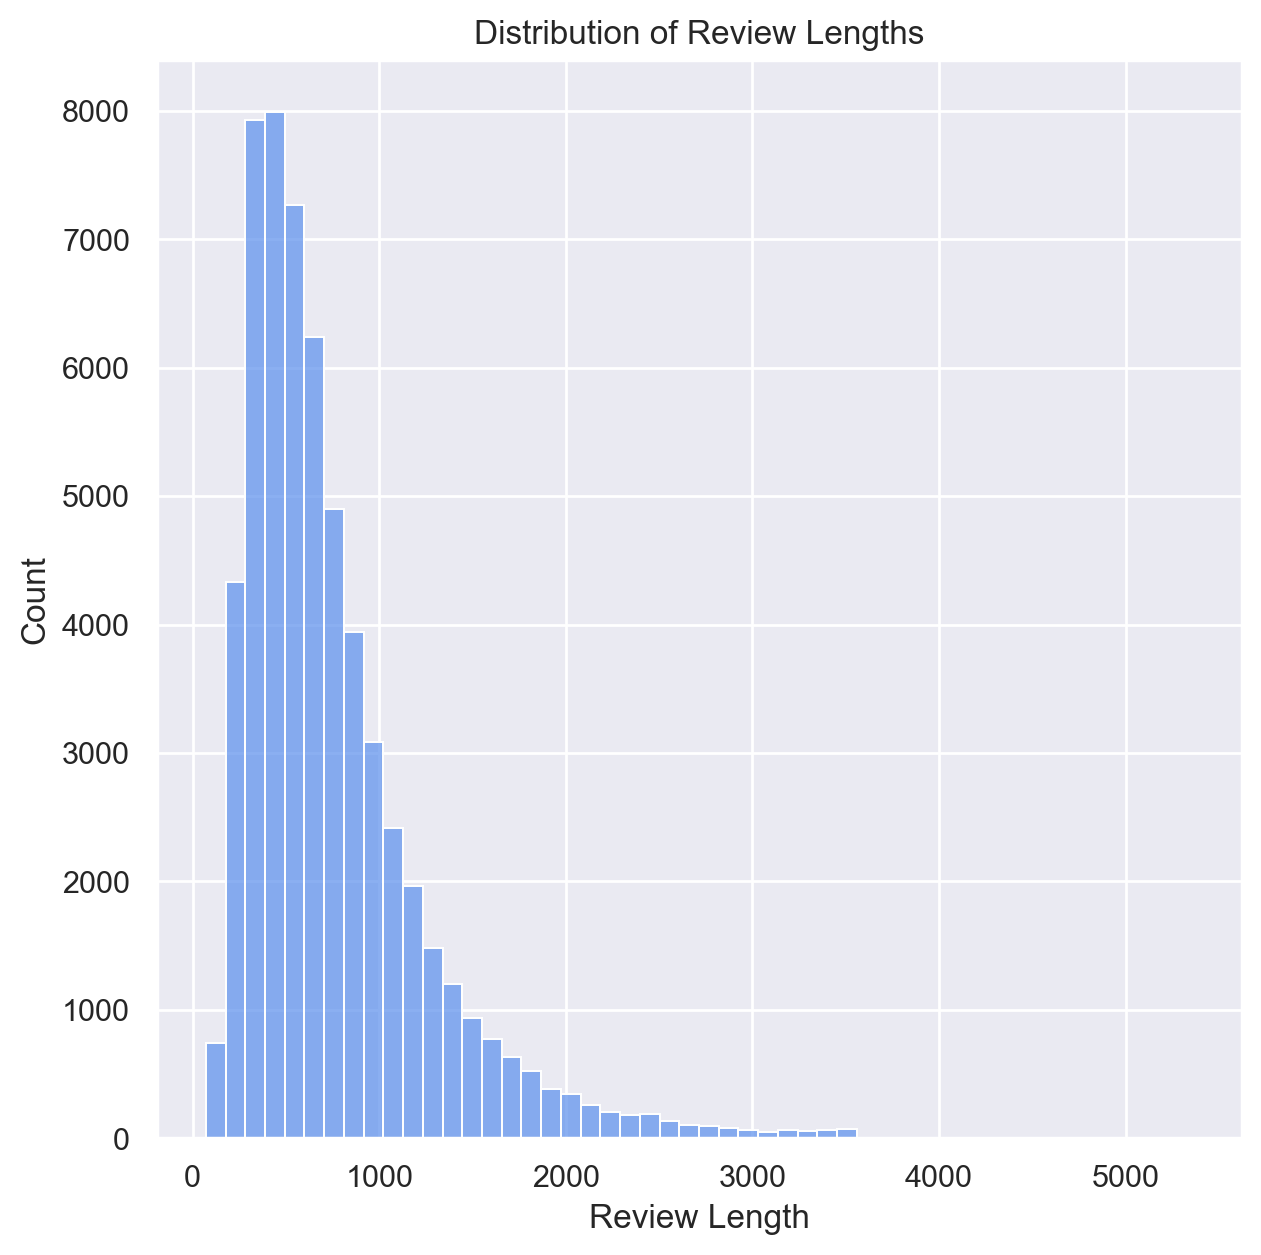

In [ ]:
cleandf['review_length'] = cleandf['customer_review'].apply(len)
plt.figure(figsize=(7, 7))
sns.histplot(cleandf['review_length'], bins=50, color='cornflowerblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.show()

**Summary:**
- The distribution of review lengths ranges from 71 to 5000+ characters.
- The average review legnth consists of approx. 753 characters

In [ ]:
cleandf['review_word_count'] = cleandf['customer_review'].apply(lambda x: len(x.split()))

# Group by 'recommended' column and calculate the average review length for each group
review_length_by_sentiment = round(cleandf.groupby('recommended')['review_word_count'].mean(), 0)

# Display the results
print(review_length_by_sentiment)

recommended
no     159.0
yes    117.0
Name: review_word_count, dtype: float64


**Bonus:** Word length

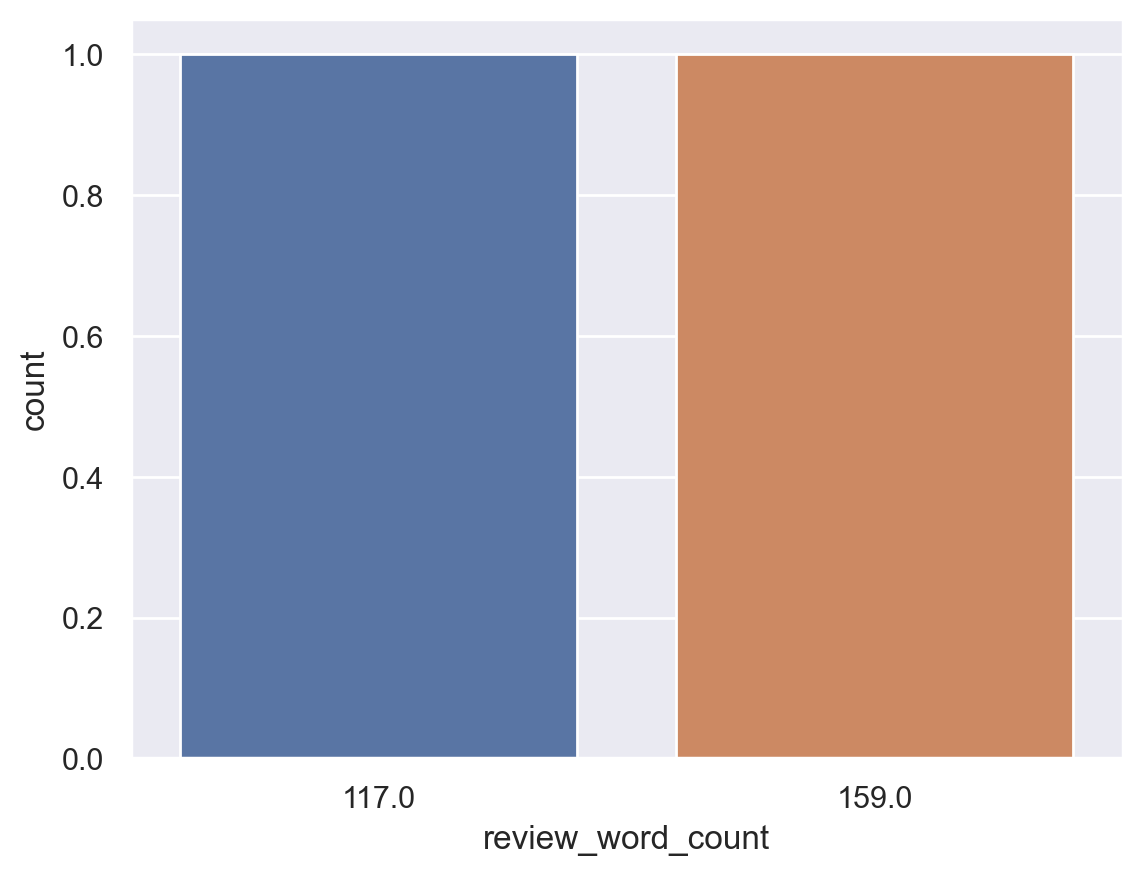

In [ ]:
sns.countplot(x=review_length_by_sentiment, data=cleandf)
plt.show()

In [ ]:
word_vec = CountVectorizer(max_features= 500, min_df=0.01, stop_words='english', ngram_range=(2,2))

In [ ]:
vectorized_words = word_vec.fit_transform(cleandf['customer_review'])

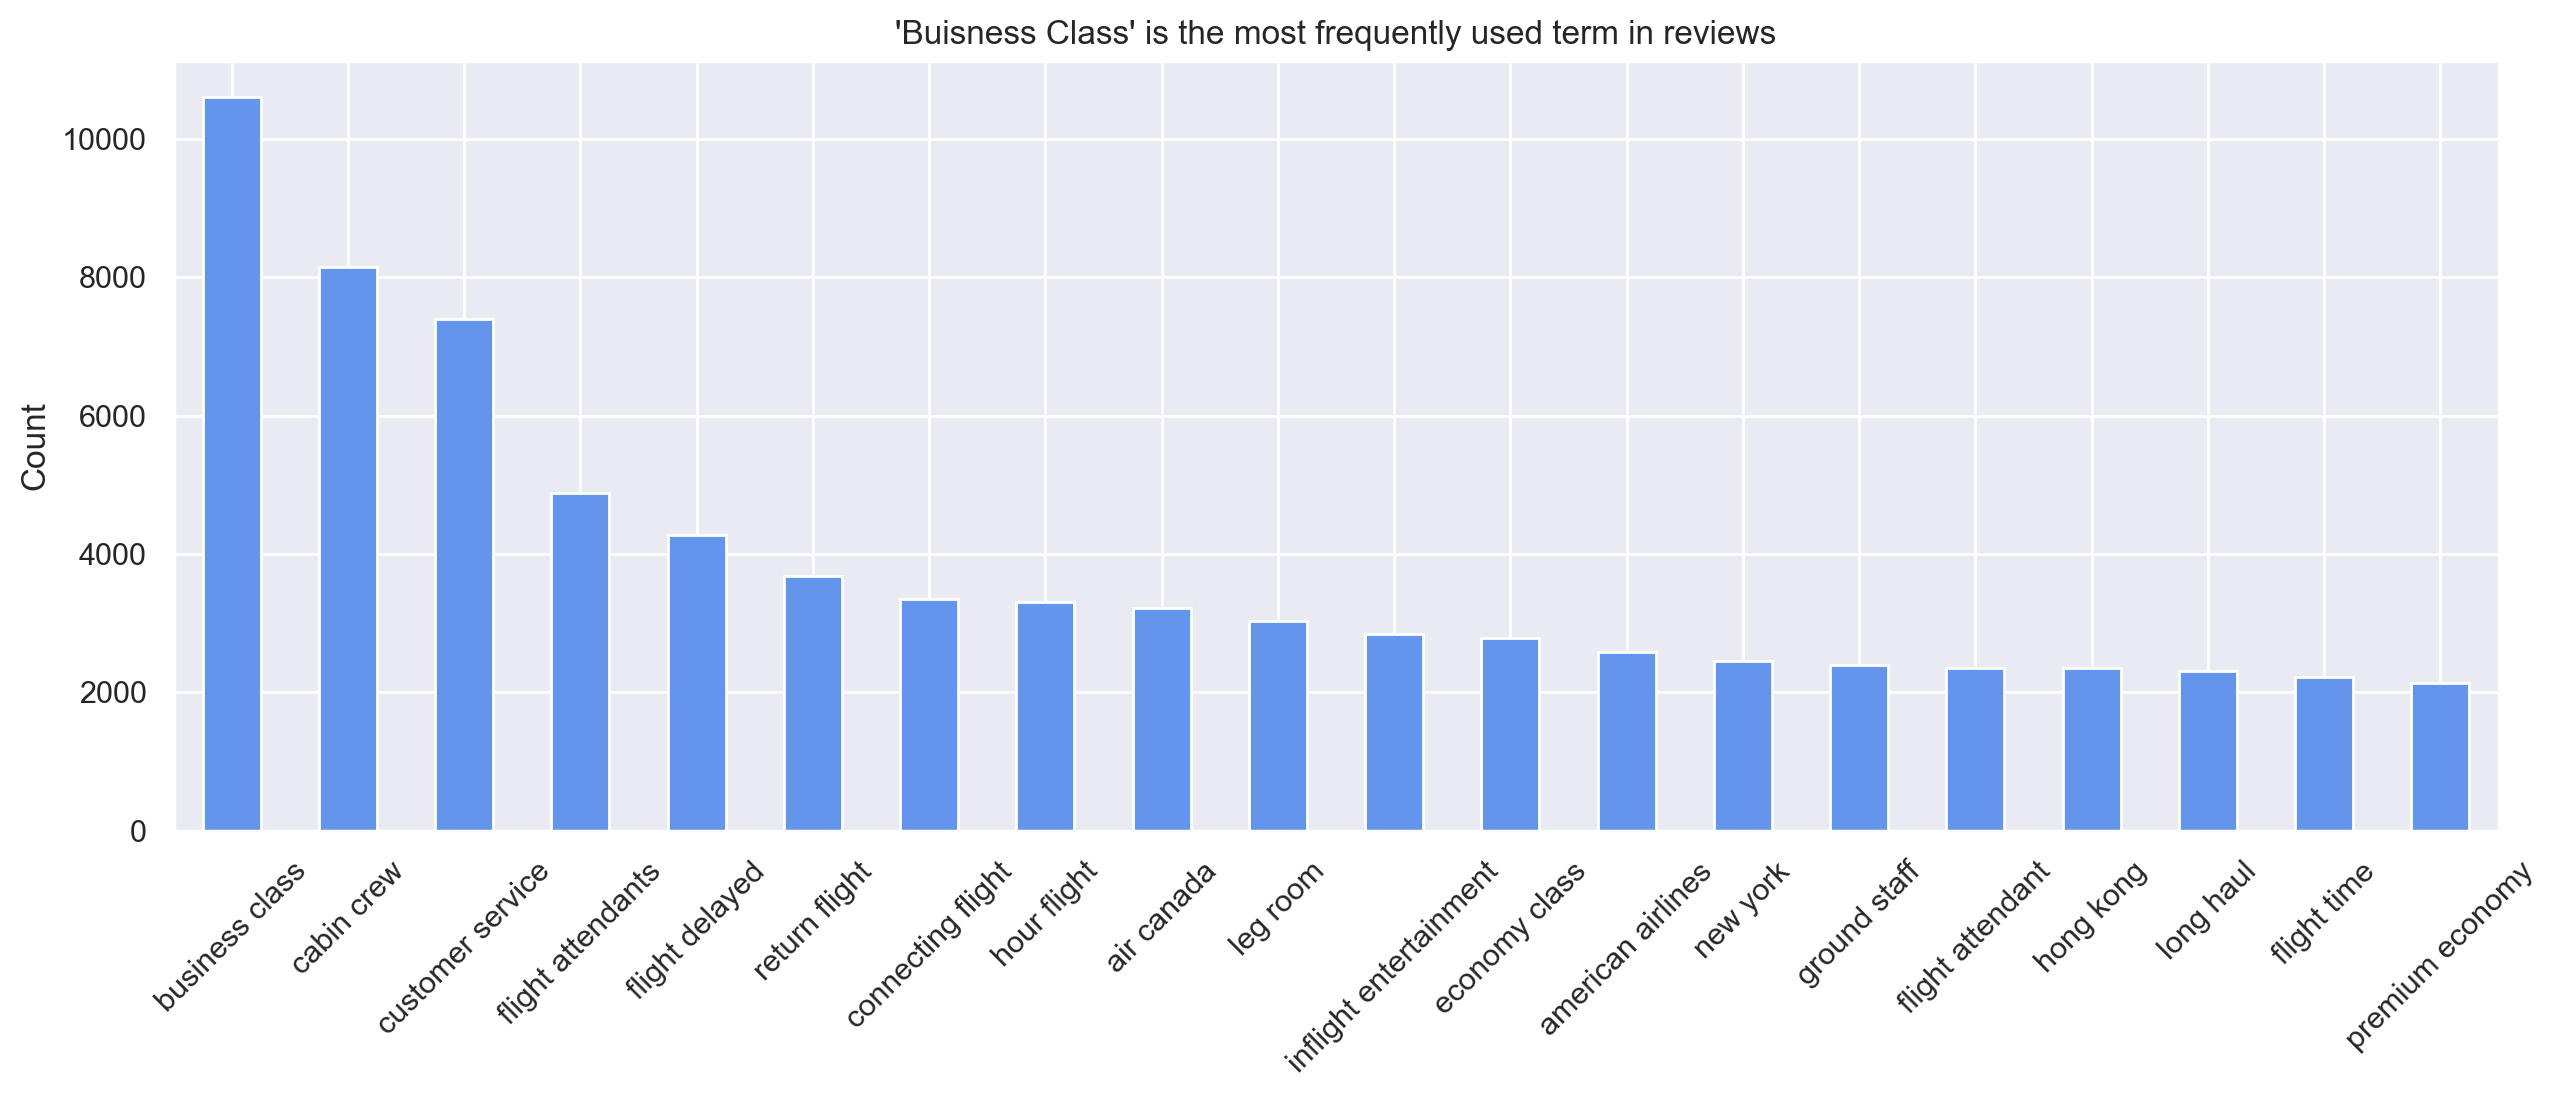

In [ ]:
freq_word_count = pd.DataFrame(
    {"counts": vectorized_words.toarray().sum(axis=0)},
    index=word_vec.get_feature_names()
).sort_values("counts", ascending=False)

freq_word_count.head(20).plot(kind="bar", figsize=(15, 5), legend=False, color='cornflowerblue')
plt.title("'Buisness Class' is the most frequently used term in reviews")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [ ]:
def plot_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, random_state=42, max_words=200, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [ ]:
recommended_reviews = ' '.join(cleandf[cleandf['recommended'] == 'yes']['customer_review'])
not_recommended_reviews = ' '.join(cleandf[cleandf['recommended'] == 'no']['customer_review'])

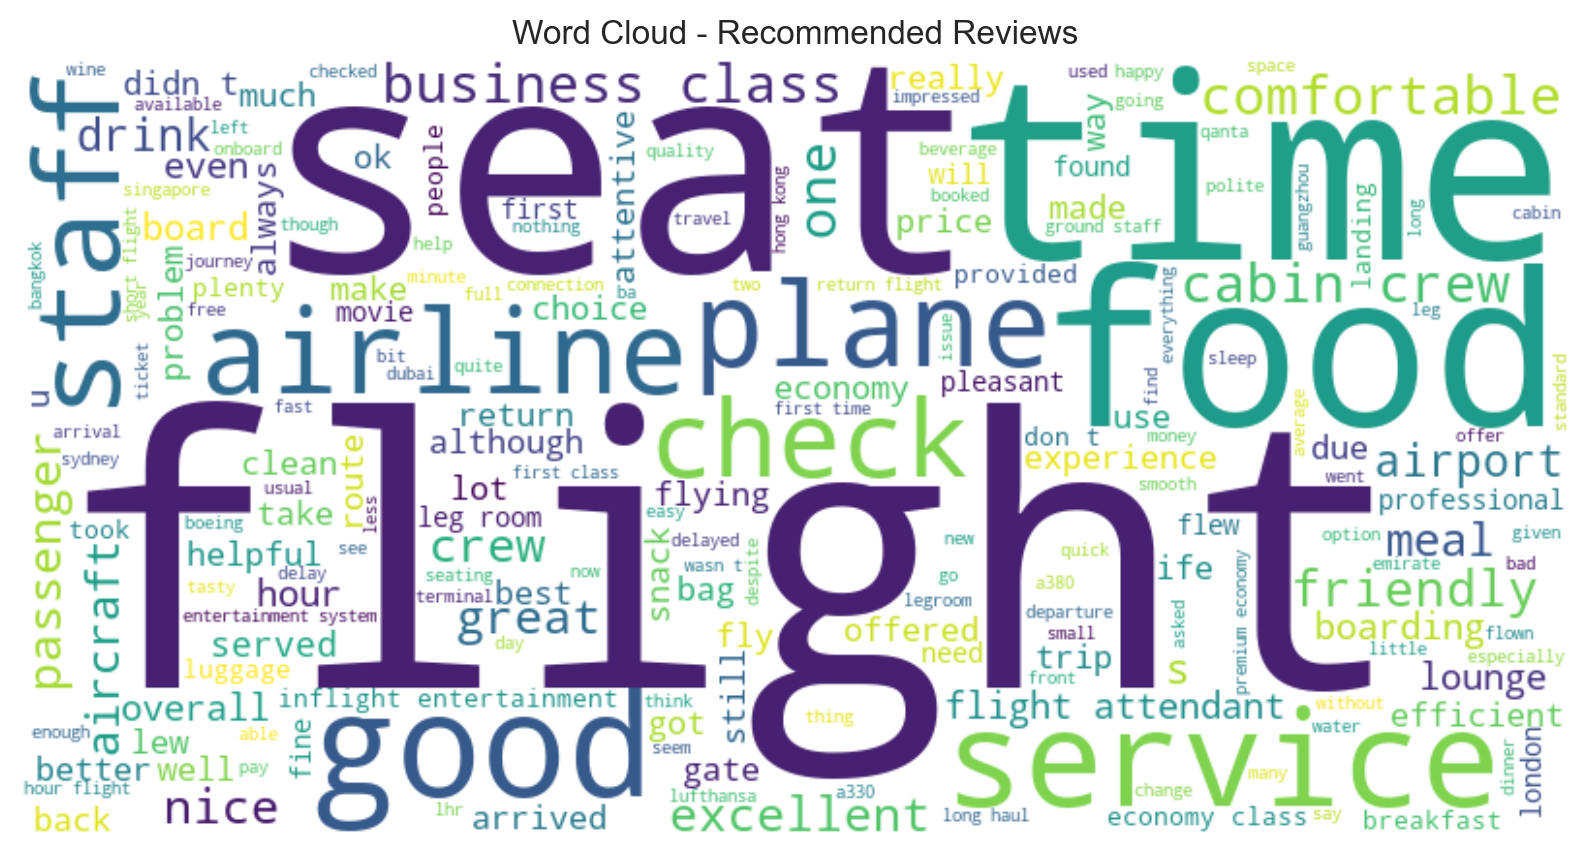

In [ ]:
plot_word_cloud(recommended_reviews, 'Word Cloud - Recommended Reviews')

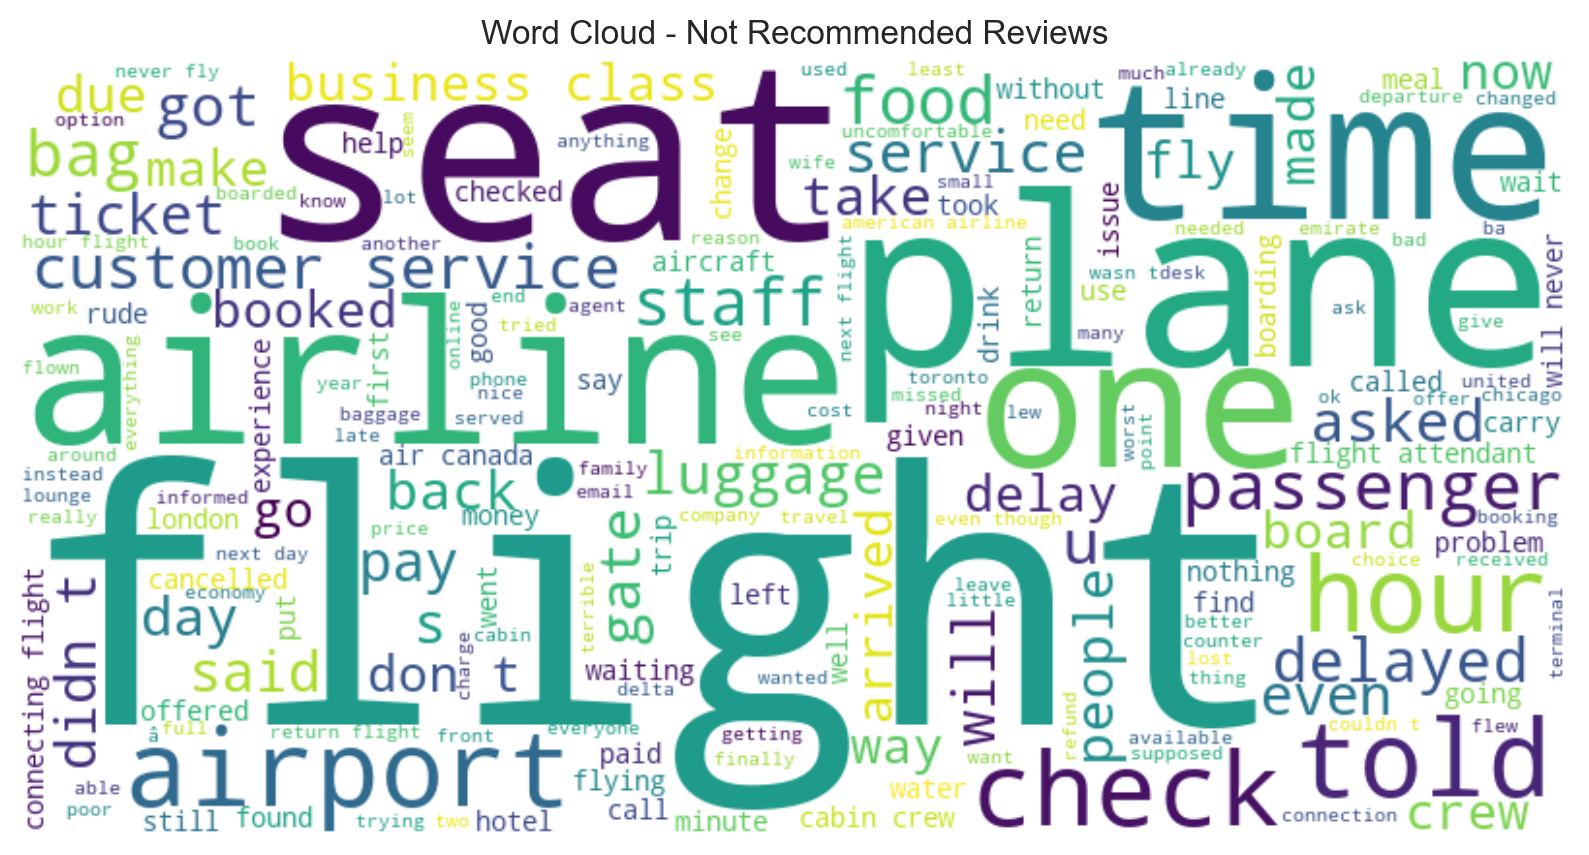

In [ ]:
plot_word_cloud(not_recommended_reviews, 'Word Cloud - Not Recommended Reviews')

**Summary:**

- The most common words in recommended reviews include [seat, airline, flight, service, time, food].

- Notable terms in non-recommended reviews are [seat, time, plane, airport, delayed].

**Implications for use case:**

- Identifying frequent terms helps us uncover specific aspects that customers appreciate or dislike (push and pull factors)

- We can tailor customer service responses to address common concerns raised by customers with the aim of meeting and/or exceeding expectations

#### EDA and Distribution Summary

**Airline:**

- Top 3 Airlines are based in the USA
- Spirit Airlines is the airline with the most reviews(this does not neccesarily mean a good thing)

**Overall Rating**

- A bimodal distribution, with a large group of passengers either rating at the top or the bottom of the scale.

**Distribution or Recommended**

- A lot more passengers would not recommend their airline experience in comparison to those who will

**Distribution of reviews by year**

- More reviews in the recent years in comparison to the earlier years
- 2015 had the most reviews
- Drop of reviews in 2019 from 2018

**Distribution of reviews by month**

- A very balanced quantity all year round
- A drop of reviews in months related to seasonality i.e. February

**Distribution of cabin class**

- Naturally, the majority of reviews coming from Economy class passengers
- More business class reviews could indicate negativity due to perhaps expectations not being met.

**Correlation between numerical data**

- All rating focused categories positively correlate to overall rating.
- Safe to assume linear models could showcase the most impactful feature(category) on overall rating.

**Target column** 

- We have a 52-48 split with 52% of the dataset within the negative sentiment class

**Indications of sentiment**

Common interests for both positive and negative sentimentt classes :
- customer service
- flights
- seat
- time



In the next notebook, I will be going through some more cleaning and pre-processing, with a focus on text data to build a baseline model.